# Problem Statement

Recruiting and retaining drivers is seen by industry watchers as a tough battle for our taxi booking company. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, company is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of this taxi booking company, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like:-

Demographics (city, age, gender etc.)
Tenure information (joining date, Last Date)
Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)


**Column Profiling:-**

MMMM-YY : Reporting Date (Monthly)

Driver_ID : Unique id for drivers

Age : Age of the driver

Gender : Gender of the driver – Male : 0, Female: 1

City : City Code of the driver

Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate

Income : Monthly average Income of the driver

Date Of Joining : Joining date for the driver

LastWorkingDate : Last date of working for the driver

Joining Designation : Designation of the driver at the time of joining

Grade : Grade of the driver at the time of reporting

Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)



In [ ]:
import pandas as pd

df = pd.read_csv("/content/taxi_driver.csv")

In [ ]:
df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [ ]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
df.isna().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [ ]:
#Lets drop the useless column
df.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:
##Converting 'MMM-YY', "Dateofjoining" & "LastWorkingDate" feature to datetime type
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [ ]:
#NOW lets create seperate dataframe for numerical columns only
import numpy as np

df_num = df.select_dtypes(np.number)

In [ ]:
#Driver ID is of no use when we are doing KNN imputation. SO lets drop it
df_num.drop("Driver_ID",inplace =True,axis = 1)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   19043 non-null  float64
 1   Gender                19052 non-null  float64
 2   Education_Level       19104 non-null  int64  
 3   Income                19104 non-null  int64  
 4   Joining Designation   19104 non-null  int64  
 5   Grade                 19104 non-null  int64  
 6   Total Business Value  19104 non-null  int64  
 7   Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 1.2 MB


In [ ]:
df_num.isna().sum()

Age                     61
Gender                  52
Education_Level          0
Income                   0
Joining Designation      0
Grade                    0
Total Business Value     0
Quarterly Rating         0
dtype: int64

In [ ]:
df_num["Gender"].value_counts()

0.0    11074
1.0     7978
Name: Gender, dtype: int64

In [ ]:
num_cols = df_num.columns.tolist()

# KNN imputation Of Missing Values

In [ ]:
#Now lets do KNN imputation for missing values in age and Gender
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean',)
imputer.fit(df_num)
# transform the dataset
df_num = imputer.transform(df_num)

In [ ]:
df_num =  pd.DataFrame(df_num, columns=num_cols)

In [ ]:
df_num

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...
19099,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0
19100,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0
19101,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0
19102,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0


In [ ]:
df_num.isna().sum()

Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

In [ ]:
df_num["Gender"].value_counts()

0.0    11082
1.0     7984
0.6       13
0.2        9
0.4        9
0.8        7
Name: Gender, dtype: int64

In [ ]:
#if KNN imputation value came out to be greater than 0.5 then that means majiority neighbours was of class 1

# Replace values in the 'Gender' column
df_num['Gender'].replace({0.6: 1, 0.8: 1}, inplace=True)
df_num['Gender'].replace({0.4: 0, 0.2: 0}, inplace=True)

In [ ]:
df_num["Gender"].value_counts()

0.0    11100
1.0     8004
Name: Gender, dtype: int64

In [ ]:
#Now lets get the remaining columns
remaining_columns=list(set(df.columns).difference(set(num_cols)))
remaining_columns

['MMM-YY', 'LastWorkingDate', 'Driver_ID', 'Dateofjoining', 'City']

In [ ]:
#Now lets concat this with our data
df2 = pd.concat([df_num, df[remaining_columns]],axis=1)

In [ ]:
df2

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,LastWorkingDate,Driver_ID,Dateofjoining,City
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019-01-01,NaT,1,2018-12-24,C23
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2019-02-01,NaT,1,2018-12-24,C23
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019-03-01,2019-03-11,1,2018-12-24,C23
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-01,NaT,2,2020-11-06,C7
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-12-01,NaT,2,2020-11-06,C7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0,2020-08-01,NaT,2788,2020-06-08,C27
19100,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0,2020-09-01,NaT,2788,2020-06-08,C27
19101,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0,2020-10-01,NaT,2788,2020-06-08,C27
19102,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0,2020-11-01,NaT,2788,2020-06-08,C27


# Aggregation Of Data for each Driver

In [ ]:
#NOw lets aggregate values of each driver for each month
agg_dict = {'Age':'max', 'Gender':'first','City':'first',
 'Education_Level':'last', 'Income':'last',
 'Joining Designation':'last','Grade':'last',
 'Dateofjoining':'last','LastWorkingDate':'last',
 'Total Business Value':'sum','Quarterly Rating':'last'}

df2 = df2.groupby(['Driver_ID','MMM-YY']).aggregate(agg_dict)

In [ ]:
df2

Age  Gender City  Education_Level   Income  \
Driver_ID MMM-YY                                                    
1         2019-01-01  28.0     0.0  C23              2.0  57387.0   
          2019-02-01  28.0     0.0  C23              2.0  57387.0   
          2019-03-01  28.0     0.0  C23              2.0  57387.0   
2         2020-11-01  31.0     0.0   C7              2.0  67016.0   
          2020-12-01  31.0     0.0   C7              2.0  67016.0   
...                    ...     ...  ...              ...      ...   
2788      2020-08-01  30.0     0.0  C27              2.0  70254.0   
          2020-09-01  30.0     0.0  C27              2.0  70254.0   
          2020-10-01  30.0     0.0  C27              2.0  70254.0   
          2020-11-01  30.0     0.0  C27              2.0  70254.0   
          2020-12-01  30.0     0.0  C27              2.0  70254.0   

                      Joining Designation  Grade Dateofjoining  \
Driver_ID MMM-YY                                                 
1         2019-01-01                  1.0    1.0    2018-12-24   
          2019-02-01                  1.0    1.0    2018-12-24   
          2019-03-01                  1.0    1.0    2018-12-24   
2         2020-11-01                  2.0    2.0    2020-11-06   
          2020-12-01                  2.0    2.0    2020-11-06   
...                                   ...    ...           ...   
2788      2020-08-01                  2.0    2.0    2020-06-08   
          2020-09-01                  2.0    2.0    2020-06-08   
          2020-10-01                  2.0    2.0    2020-06-08   
          2020-11-01                  2.0    2.0    2020-06-08   
          2020-12-01                  2.0    2.0    2020-06-08   

                     LastWorkingDate  Total Business Value  Quarterly Rating  
Driver_ID MMM-YY                                                              
1         2019-01-01             NaT             2381060.0               2.0  
          2019-02-01             NaT             -665480.0               2.0  
          2019-03-01      2019-03-11                   0.0               2.0  
2         2020-11-01             NaT                   0.0               1.0  
          2020-12-01             NaT                   0.0               1.0  
...                              ...                   ...               ...  
2788      2020-08-01             NaT              740280.0               3.0  
          2020-09-01             NaT              448370.0               3.0  
          2020-10-01             NaT                   0.0               2.0  
          2020-11-01             NaT              200420.0               2.0  
          2020-12-01             NaT              411480.0               2.0  

[19104 rows x 11 columns]

In [ ]:
#NOW lets sort these indexes
df2 = df2.sort_index(ascending=[True,True])

In [ ]:
df2

Age  Gender City  Education_Level   Income  \
Driver_ID MMM-YY                                                    
1         2019-01-01  28.0     0.0  C23              2.0  57387.0   
          2019-02-01  28.0     0.0  C23              2.0  57387.0   
          2019-03-01  28.0     0.0  C23              2.0  57387.0   
2         2020-11-01  31.0     0.0   C7              2.0  67016.0   
          2020-12-01  31.0     0.0   C7              2.0  67016.0   
...                    ...     ...  ...              ...      ...   
2788      2020-08-01  30.0     0.0  C27              2.0  70254.0   
          2020-09-01  30.0     0.0  C27              2.0  70254.0   
          2020-10-01  30.0     0.0  C27              2.0  70254.0   
          2020-11-01  30.0     0.0  C27              2.0  70254.0   
          2020-12-01  30.0     0.0  C27              2.0  70254.0   

                      Joining Designation  Grade Dateofjoining  \
Driver_ID MMM-YY                                                 
1         2019-01-01                  1.0    1.0    2018-12-24   
          2019-02-01                  1.0    1.0    2018-12-24   
          2019-03-01                  1.0    1.0    2018-12-24   
2         2020-11-01                  2.0    2.0    2020-11-06   
          2020-12-01                  2.0    2.0    2020-11-06   
...                                   ...    ...           ...   
2788      2020-08-01                  2.0    2.0    2020-06-08   
          2020-09-01                  2.0    2.0    2020-06-08   
          2020-10-01                  2.0    2.0    2020-06-08   
          2020-11-01                  2.0    2.0    2020-06-08   
          2020-12-01                  2.0    2.0    2020-06-08   

                     LastWorkingDate  Total Business Value  Quarterly Rating  
Driver_ID MMM-YY                                                              
1         2019-01-01             NaT             2381060.0               2.0  
          2019-02-01             NaT             -665480.0               2.0  
          2019-03-01      2019-03-11                   0.0               2.0  
2         2020-11-01             NaT                   0.0               1.0  
          2020-12-01             NaT                   0.0               1.0  
...                              ...                   ...               ...  
2788      2020-08-01             NaT              740280.0               3.0  
          2020-09-01             NaT              448370.0               3.0  
          2020-10-01             NaT                   0.0               2.0  
          2020-11-01             NaT              200420.0               2.0  
          2020-12-01             NaT              411480.0               2.0  

[19104 rows x 11 columns]

In [ ]:
df2.reset_index(inplace=True)

# Creating New Features

In [ ]:
#Lets find the increase/decrease in total bussiness value for each driver with each and every reporting month

# Calculate the difference between each row and its previous row within each group
df2['diff_bussValue'] = df2.groupby('Driver_ID')['Total Business Value'].diff()

# Fill NaN values in the 'diff_bussValue' column with 0
df2['diff_bussValue'] = df2['diff_bussValue'].fillna(0)

# Calculate the sum of differences for each group
df2['SumOf_diff_bussValue'] = df2.groupby('Driver_ID')['diff_bussValue'].cumsum()

In [ ]:
df2

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,diff_bussValue,SumOf_diff_bussValue
0,1,2019-01-01,28.0,0.0,C23,2.0,57387.0,1.0,1.0,2018-12-24,NaT,2381060.0,2.0,0.0,0.0
1,1,2019-02-01,28.0,0.0,C23,2.0,57387.0,1.0,1.0,2018-12-24,NaT,-665480.0,2.0,-3046540.0,-3046540.0
2,1,2019-03-01,28.0,0.0,C23,2.0,57387.0,1.0,1.0,2018-12-24,2019-03-11,0.0,2.0,665480.0,-2381060.0
3,2,2020-11-01,31.0,0.0,C7,2.0,67016.0,2.0,2.0,2020-11-06,NaT,0.0,1.0,0.0,0.0
4,2,2020-12-01,31.0,0.0,C7,2.0,67016.0,2.0,2.0,2020-11-06,NaT,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2788,2020-08-01,30.0,0.0,C27,2.0,70254.0,2.0,2.0,2020-06-08,NaT,740280.0,3.0,242590.0,740280.0
19100,2788,2020-09-01,30.0,0.0,C27,2.0,70254.0,2.0,2.0,2020-06-08,NaT,448370.0,3.0,-291910.0,448370.0
19101,2788,2020-10-01,30.0,0.0,C27,2.0,70254.0,2.0,2.0,2020-06-08,NaT,0.0,2.0,-448370.0,0.0
19102,2788,2020-11-01,30.0,0.0,C27,2.0,70254.0,2.0,2.0,2020-06-08,NaT,200420.0,2.0,200420.0,200420.0


In [ ]:
df2[df2["Driver_ID"]==2788]

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,diff_bussValue,SumOf_diff_bussValue
19097,2788,2020-06-01,29.0,0.0,C27,2.0,70254.0,2.0,2.0,2020-06-08,NaT,0.0,1.0,0.0,0.0
19098,2788,2020-07-01,30.0,0.0,C27,2.0,70254.0,2.0,2.0,2020-06-08,NaT,497690.0,3.0,497690.0,497690.0
19099,2788,2020-08-01,30.0,0.0,C27,2.0,70254.0,2.0,2.0,2020-06-08,NaT,740280.0,3.0,242590.0,740280.0
19100,2788,2020-09-01,30.0,0.0,C27,2.0,70254.0,2.0,2.0,2020-06-08,NaT,448370.0,3.0,-291910.0,448370.0
19101,2788,2020-10-01,30.0,0.0,C27,2.0,70254.0,2.0,2.0,2020-06-08,NaT,0.0,2.0,-448370.0,0.0
19102,2788,2020-11-01,30.0,0.0,C27,2.0,70254.0,2.0,2.0,2020-06-08,NaT,200420.0,2.0,200420.0,200420.0
19103,2788,2020-12-01,30.0,0.0,C27,2.0,70254.0,2.0,2.0,2020-06-08,NaT,411480.0,2.0,211060.0,411480.0


In [ ]:
#Now lets drop this useless column diff_bussValue
df2.drop("diff_bussValue",inplace=True,axis=1)

In [ ]:
#Now lets create a new feature "IncomeIncrease" whose value is 1 if income of a driver has increased over the from first reporting month to last.
#Value will be 0 if its the same &
#Value will be -1 if monthly income of a driver has decreased from first reporting month to last one.


# Iterate over unique Driver_IDs
income_increase_dict = {}
for driver_id, group_df in df2.groupby('Driver_ID'):
    # Check if the first value is less than the last value
    if group_df['Income'].iloc[0] < group_df['Income'].iloc[-1]:
        income_increase_dict[driver_id] = 1
    elif group_df['Income'].iloc[0] == group_df['Income'].iloc[-1]:
        income_increase_dict[driver_id] = 0
    else:
        income_increase_dict[driver_id] = -1

# Convert the dictionary to a DataFrame
income_increase_df = pd.DataFrame(list(income_increase_dict.items()), columns=['Driver_ID', 'IncomeIncrease'])

In [ ]:
income_increase_df

,Driver_ID,IncomeIncrease
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0
...,...,...
2376,2784,0
2377,2785,0
2378,2786,0
2379,2787,0


In [ ]:
income_increase_df["IncomeIncrease"].value_counts()

0    2338
1      43
Name: IncomeIncrease, dtype: int64

In [ ]:
#Lets create a new feature GradeIncrease whose value is 1 if grade of the driver has increased from first reporting date to last one
#It is -1 if grade has decreased and 0 if grade remained same

# Iterate over unique Driver_IDs_increase_dict = {}
grade_increase_dict={}
for driver_id, group_df in df2.groupby('Driver_ID'):
    # Check if the first value is less than the last value
    if group_df['Grade'].iloc[0] < group_df['Grade'].iloc[-1]:
        grade_increase_dict[driver_id] = 1
    elif group_df['Grade'].iloc[0] == group_df['Grade'].iloc[-1]:
        grade_increase_dict[driver_id] = 0
    else:
        grade_increase_dict[driver_id] = -1

# Convert the dictionary to a DataFrame
grade_increase_df = pd.DataFrame(list(grade_increase_dict.items()), columns=['Driver_ID', 'GradeIncrease'])

In [ ]:
grade_increase_df["GradeIncrease"].value_counts()

0    2338
1      43
Name: GradeIncrease, dtype: int64

In [ ]:
#Now lets aggregate values for each driver ID
agg_dict = {'Age':'max', 'Gender':'last','City':'first',
 'Education_Level':'last', 'Income':'last',
 'Joining Designation':'last','Grade':'last',
 'Dateofjoining':'last','LastWorkingDate':'last',
 'Total Business Value':'sum','Quarterly Rating':'last', 'SumOf_diff_bussValue':'last'}

df2_agg = df2.groupby(['Driver_ID']).aggregate(agg_dict)


In [ ]:
df2_agg.reset_index(inplace=True)
df2_agg

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,SumOf_diff_bussValue
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,2018-12-24,2019-03-11,1715580.0,2.0,-2381060.0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,2020-11-06,NaT,0.0,1.0,0.0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,2019-12-07,2020-04-27,350000.0,1.0,0.0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,2019-01-09,2019-03-07,120360.0,1.0,0.0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,2020-07-31,NaT,1265000.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,2015-10-15,NaT,21748820.0,4.0,-721110.0
2377,2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,2020-08-28,2020-10-28,0.0,1.0,0.0
2378,2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2018-07-31,2019-09-22,2815090.0,1.0,-221080.0
2379,2787,28.0,1.0,C20,2.0,69498.0,1.0,1.0,2018-07-21,2019-06-20,977830.0,1.0,-408090.0


In [ ]:
#lets create new column RatingIncreased to check if quarterly rating of a driver increased or not

# Iterate over unique Driver_IDs
rating_increase_dict = {}
for driver_id, group_df in df2.groupby('Driver_ID'):
    # Check if the first value is less than the last value
    if group_df['Quarterly Rating'].iloc[0] < group_df['Quarterly Rating'].iloc[-1]:
        rating_increase_dict[driver_id] = 1
    elif group_df['Quarterly Rating'].iloc[0] == group_df['Quarterly Rating'].iloc[-1]:
        rating_increase_dict[driver_id] = 0
    else:
        rating_increase_dict[driver_id] = -1

# Convert the dictionary to a DataFrame
rating_increase_df = pd.DataFrame(list(rating_increase_dict.items()), columns=['Driver_ID', 'RatingIncrease'])

In [ ]:
rating_increase_df

,Driver_ID,RatingIncrease
0,1,0
1,2,0
2,4,0
3,5,0
4,6,1
...,...,...
2376,2784,1
2377,2785,0
2378,2786,-1
2379,2787,-1


In [ ]:
rating_increase_df["RatingIncrease"].value_counts()

 0    1565
-1     458
 1     358
Name: RatingIncrease, dtype: int64

In [ ]:
#Now lets add RatingIncrease column to our main df
df2_agg = pd.merge(rating_increase_df, df2_agg, on='Driver_ID')
df2_agg

,Driver_ID,RatingIncrease,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,SumOf_diff_bussValue
0,1,0,28.0,0.0,C23,2.0,57387.0,1.0,1.0,2018-12-24,2019-03-11,1715580.0,2.0,-2381060.0
1,2,0,31.0,0.0,C7,2.0,67016.0,2.0,2.0,2020-11-06,NaT,0.0,1.0,0.0
2,4,0,43.0,0.0,C13,2.0,65603.0,2.0,2.0,2019-12-07,2020-04-27,350000.0,1.0,0.0
3,5,0,29.0,0.0,C9,0.0,46368.0,1.0,1.0,2019-01-09,2019-03-07,120360.0,1.0,0.0
4,6,1,31.0,1.0,C11,1.0,78728.0,3.0,3.0,2020-07-31,NaT,1265000.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,1,34.0,0.0,C24,0.0,82815.0,2.0,3.0,2015-10-15,NaT,21748820.0,4.0,-721110.0
2377,2785,0,34.0,1.0,C9,0.0,12105.0,1.0,1.0,2020-08-28,2020-10-28,0.0,1.0,0.0
2378,2786,-1,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2018-07-31,2019-09-22,2815090.0,1.0,-221080.0
2379,2787,-1,28.0,1.0,C20,2.0,69498.0,1.0,1.0,2018-07-21,2019-06-20,977830.0,1.0,-408090.0


In [ ]:
#NOW lets add IncomeIncrease column also
df2_agg = pd.merge(income_increase_df, df2_agg, on='Driver_ID')

In [ ]:
#Now lets also merge GradeIncrease column
df2_agg = pd.merge(grade_increase_df, df2_agg, on='Driver_ID')

In [ ]:
df2_agg

,Driver_ID,GradeIncrease,IncomeIncrease,RatingIncrease,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,SumOf_diff_bussValue
0,1,0,0,0,28.0,0.0,C23,2.0,57387.0,1.0,1.0,2018-12-24,2019-03-11,1715580.0,2.0,-2381060.0
1,2,0,0,0,31.0,0.0,C7,2.0,67016.0,2.0,2.0,2020-11-06,NaT,0.0,1.0,0.0
2,4,0,0,0,43.0,0.0,C13,2.0,65603.0,2.0,2.0,2019-12-07,2020-04-27,350000.0,1.0,0.0
3,5,0,0,0,29.0,0.0,C9,0.0,46368.0,1.0,1.0,2019-01-09,2019-03-07,120360.0,1.0,0.0
4,6,0,0,1,31.0,1.0,C11,1.0,78728.0,3.0,3.0,2020-07-31,NaT,1265000.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0,0,1,34.0,0.0,C24,0.0,82815.0,2.0,3.0,2015-10-15,NaT,21748820.0,4.0,-721110.0
2377,2785,0,0,0,34.0,1.0,C9,0.0,12105.0,1.0,1.0,2020-08-28,2020-10-28,0.0,1.0,0.0
2378,2786,0,0,-1,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2018-07-31,2019-09-22,2815090.0,1.0,-221080.0
2379,2787,0,0,-1,28.0,1.0,C20,2.0,69498.0,1.0,1.0,2018-07-21,2019-06-20,977830.0,1.0,-408090.0


In [ ]:
df2_agg.nunique()

Driver_ID               2381
GradeIncrease              2
IncomeIncrease             2
RatingIncrease             3
Age                       61
Gender                     2
City                      29
Education_Level            3
Income                  2339
Joining Designation        5
Grade                      5
Dateofjoining            869
LastWorkingDate          493
Total Business Value    1629
Quarterly Rating           4
SumOf_diff_bussValue    1161
dtype: int64

In [ ]:
df2_agg["LastWorkingDate"].isna().sum()

765

In [ ]:
## Creating a new column "Churn" using apply function
#Churn is 1 if the driver has left otherwise it is 0
df2_agg['Churn'] = df2_agg['LastWorkingDate'].apply(lambda x: 0 if pd.isna(x) else 1)

In [ ]:
#Extracting Month from DateOfJoining column and creating new feature JoiningMonth
df2_agg['JoiningMonth'] = df2_agg['Dateofjoining'].dt.month

In [ ]:
#Now lets remove useless date columns and driver_ID from our df
df2_agg.drop(["Driver_ID","Dateofjoining","LastWorkingDate"],axis=1,inplace=True)

In [ ]:
df2_agg

,GradeIncrease,IncomeIncrease,RatingIncrease,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,SumOf_diff_bussValue,Churn,JoiningMonth
0,0,0,0,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,-2381060.0,1,12
1,0,0,0,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0.0,0,11
2,0,0,0,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0.0,1,12
3,0,0,0,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0.0,1,1
4,0,0,1,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,0.0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,0,1,34.0,0.0,C24,0.0,82815.0,2.0,3.0,21748820.0,4.0,-721110.0,0,10
2377,0,0,0,34.0,1.0,C9,0.0,12105.0,1.0,1.0,0.0,1.0,0.0,1,8
2378,0,0,-1,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2815090.0,1.0,-221080.0,1,7
2379,0,0,-1,28.0,1.0,C20,2.0,69498.0,1.0,1.0,977830.0,1.0,-408090.0,1,7


# EDA: Univariate analysis

In [ ]:
#Now lets seperate out numerical columns
num_cols = ["Age","Income","Total Business Value","SumOf_diff_bussValue"]

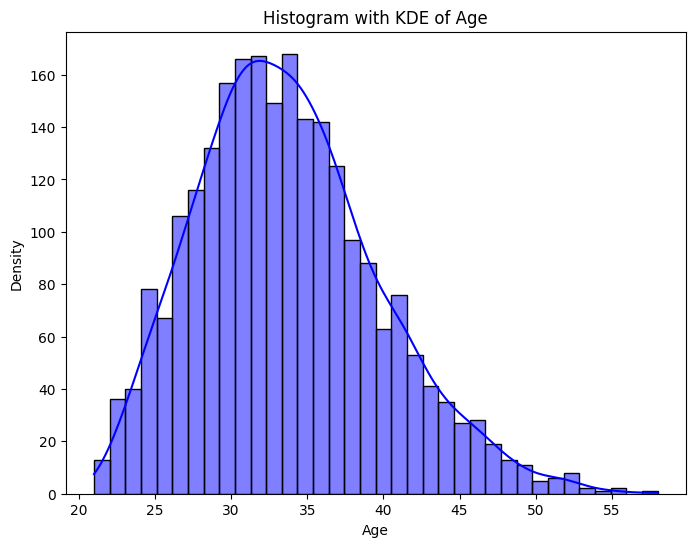

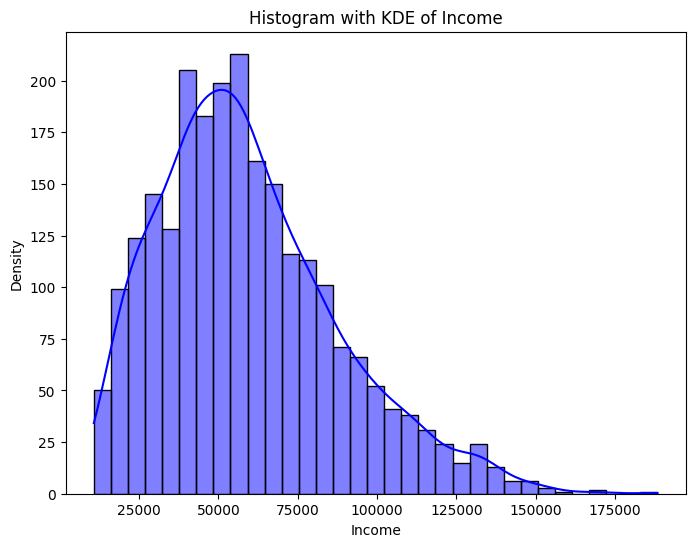

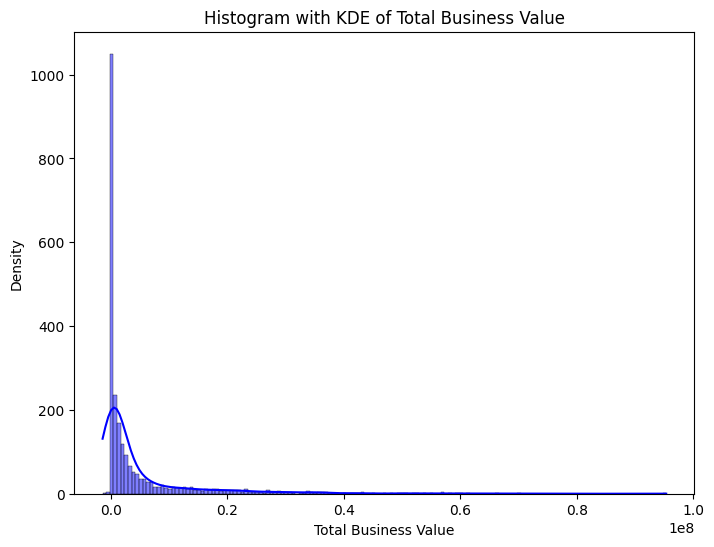

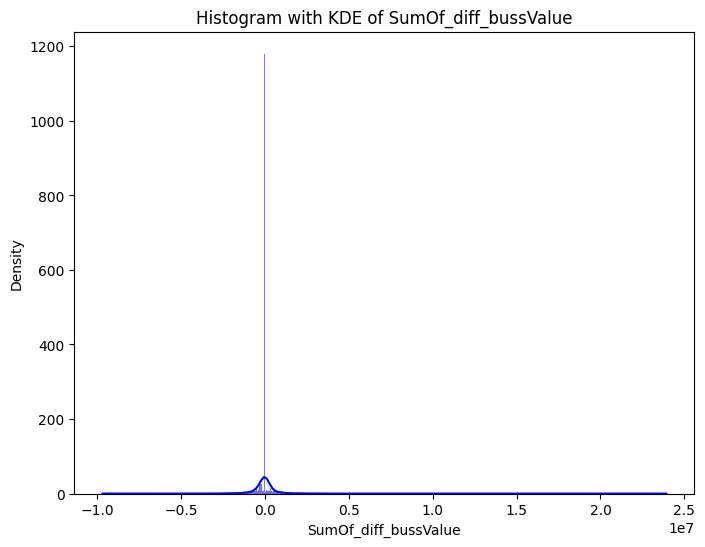

In [ ]:
# Plotting histograms for each numerical feature
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df2_agg[col], kde=True, color='blue', edgecolor='black')
    plt.title(f'Histogram with KDE of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

**Insights**
All the numerical columns have gaussian like distribution but with long right tail which means there are outliers in our numerical columns.

In [ ]:
cat_cols = ["Education_Level","Joining Designation","Grade","Quarterly Rating","JoiningMonth","IncomeIncrease","RatingIncrease","GradeIncrease","Gender","City","Churn"]

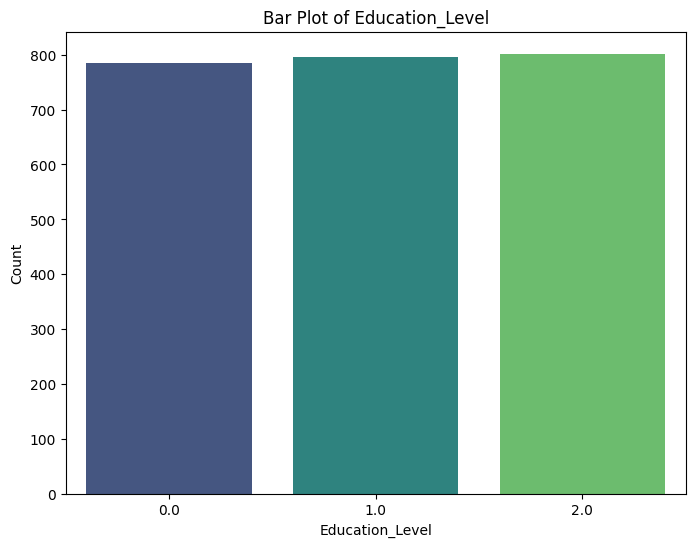

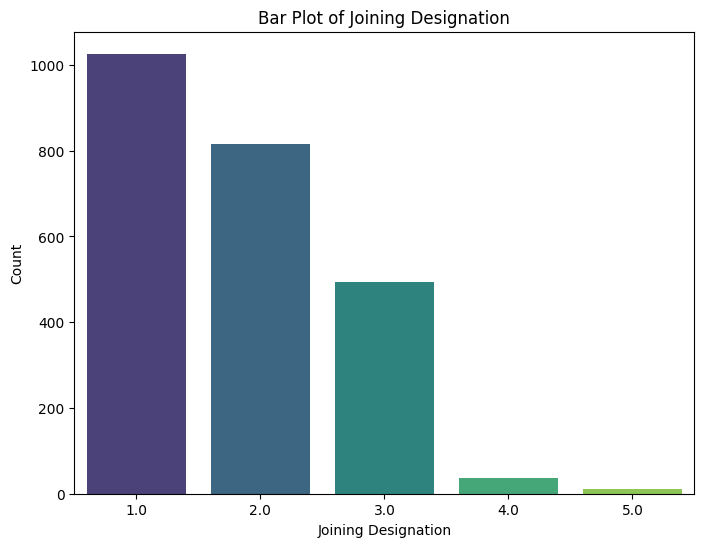

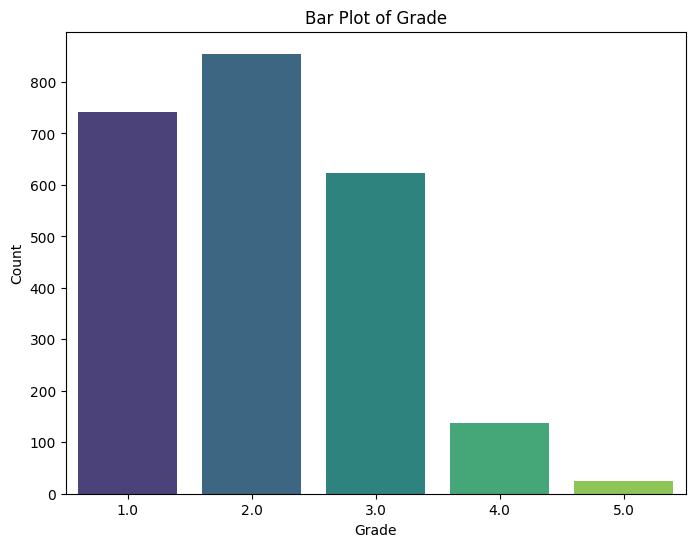

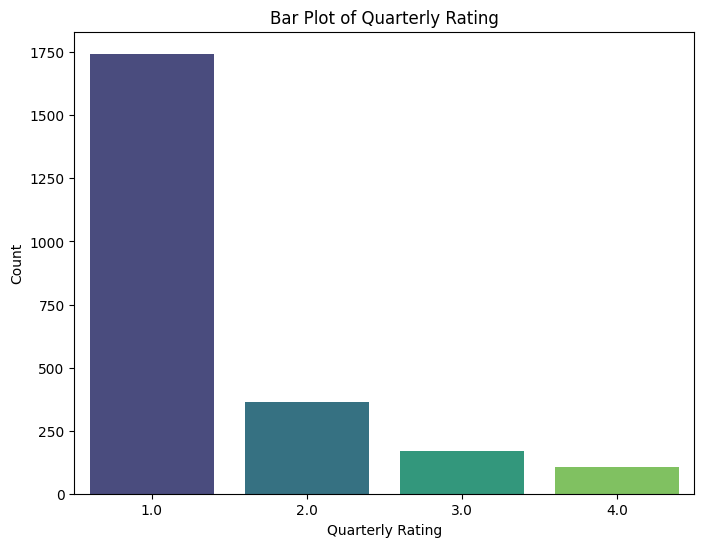

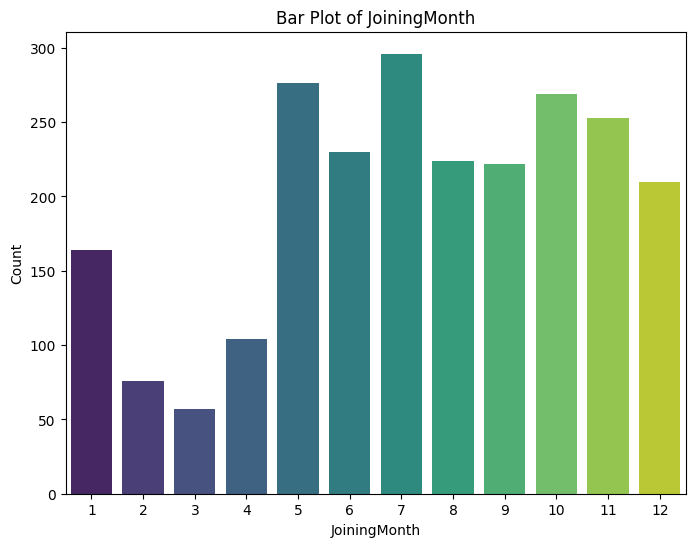

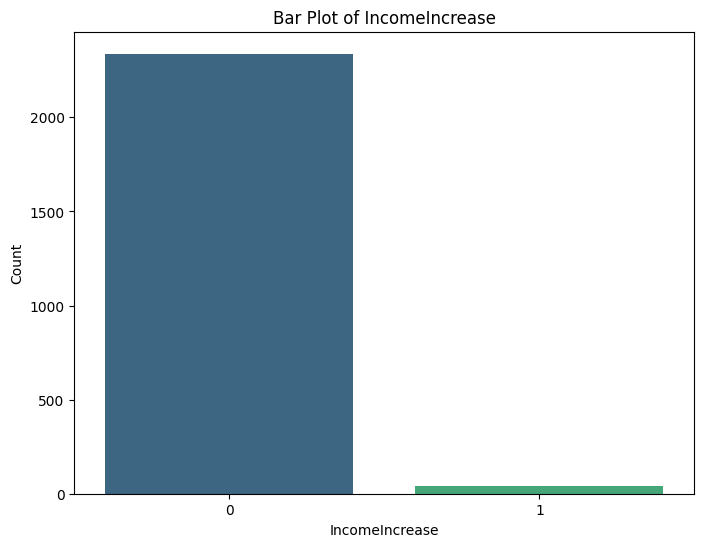

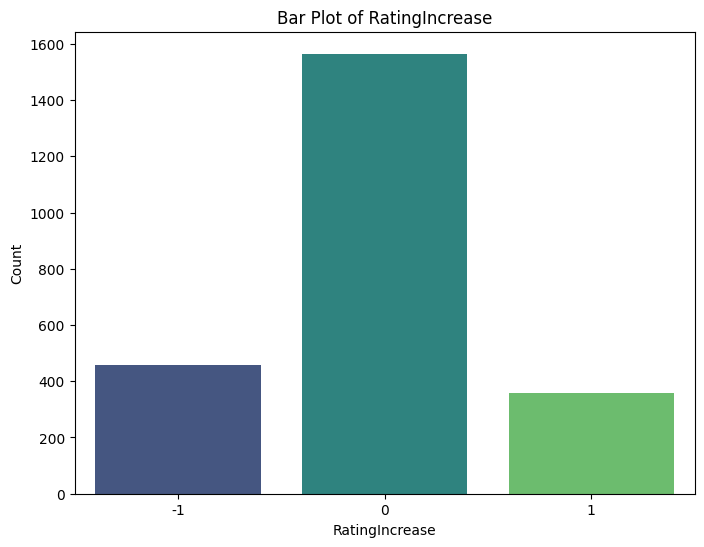

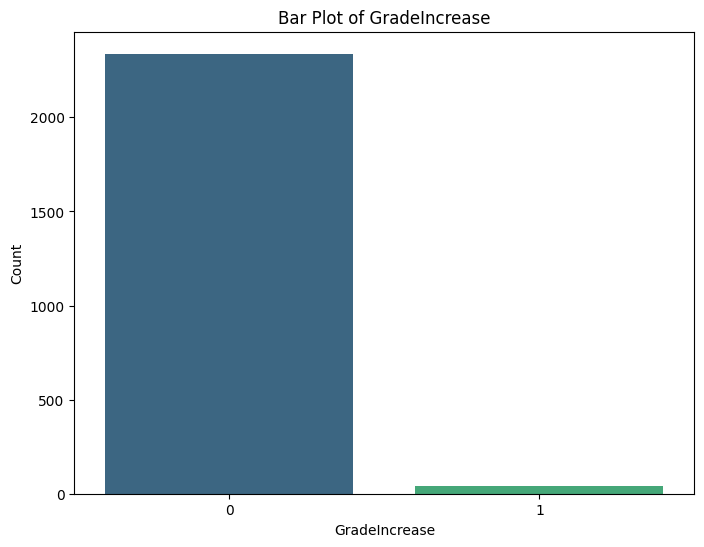

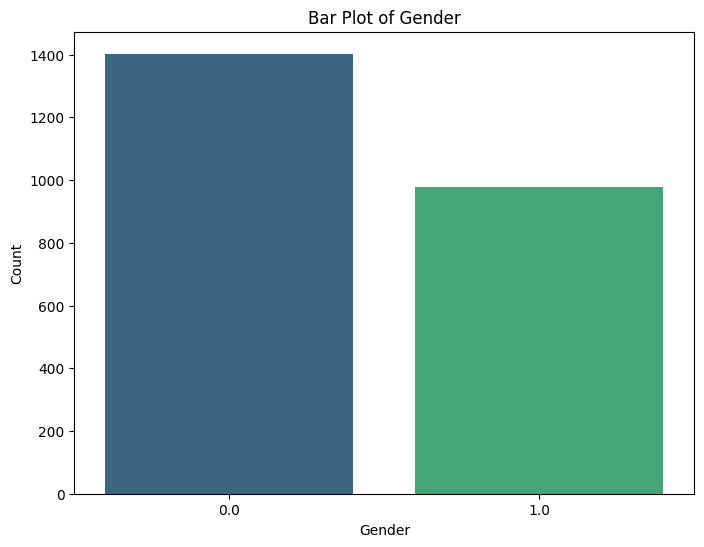

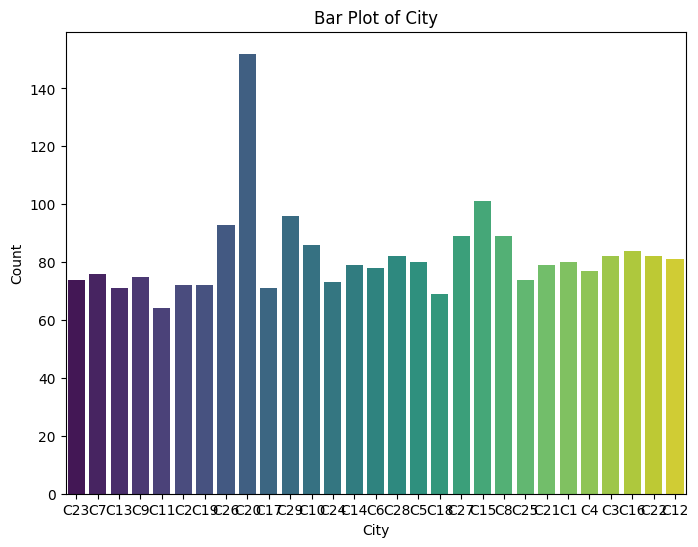

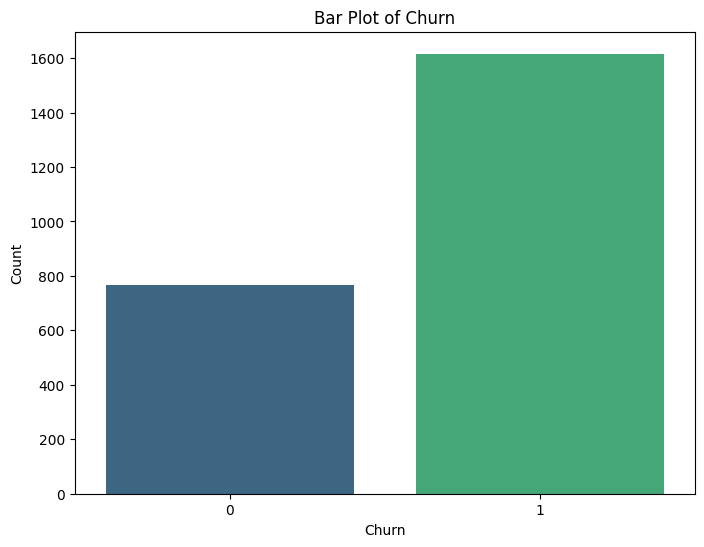

In [ ]:
# Plotting bar plots for each categorical feature
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df2_agg, palette='viridis')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

**Insights**
1)Number of Drivers for all education levels are almost equal.

2)Most drivers have joining designation of 1 and least has that of 5.

3)Most drivers has grade 2 and least has grade 5.

4)Most drivers have Quarterly Rating 1 & least has quarterly rating 4.

5)There is a significant increase in drivers joining after April(4rthMonth) compared to January to April period. Most drivers joining month is July and least is March month.

6)Only 1.80% Drivers income has increased. Income of Rest all the drivers remained same.

7) 19.2% of drivers had decrease in Rating & 15% drivers had increase in their rating. For rest of the drivers,rating remained same.

8)1.8% drivers had their grade increase. For the rest, it reamained the same.

9)C20 had the highest number of occurunces in data and C11 was the least occuring city in the data.

10)32.1% of drivers in our dataset has remained & rest all have churned.


# EDA: Bivariate analysis

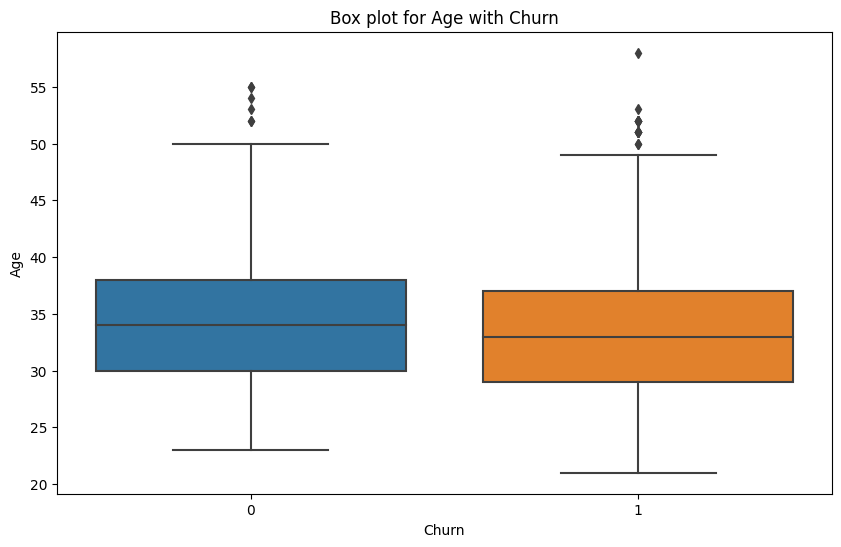

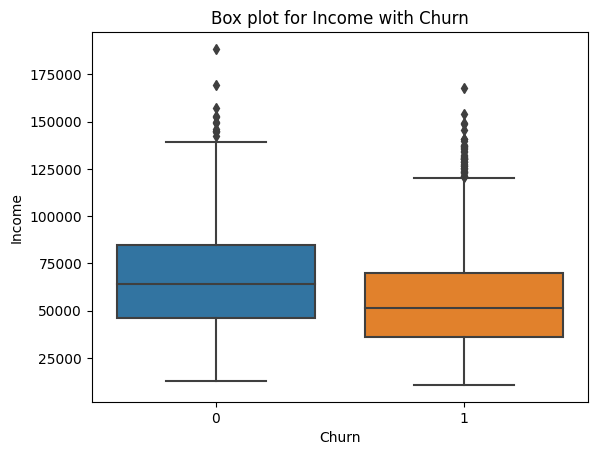

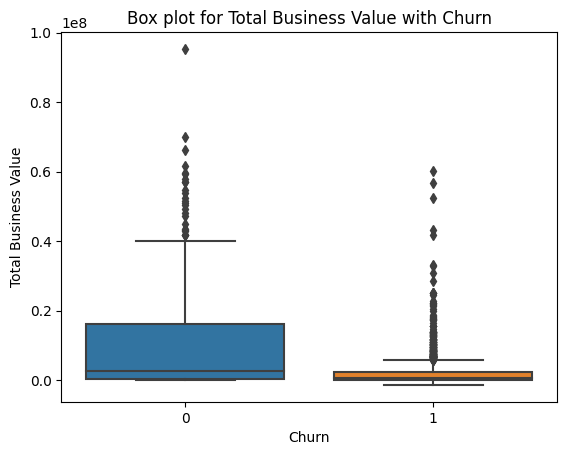

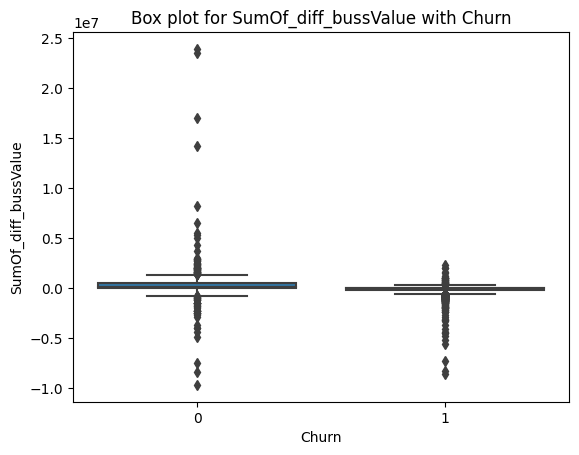

In [ ]:
plt.figure(figsize=(10, 6))
for col in num_cols:  # Exclude the target column
    sns.boxplot(x='Churn', y=col, data=df2_agg)
    plt.title(f'Box plot for {col} with Churn')
    plt.show()

**Insight**
For all the four features:- Age,Income,Total Bussiness Value and SumOfdiffbussValue, the Median and full boxplot of drivers who have not churned seems higher as compared to that of drivers who have churned.

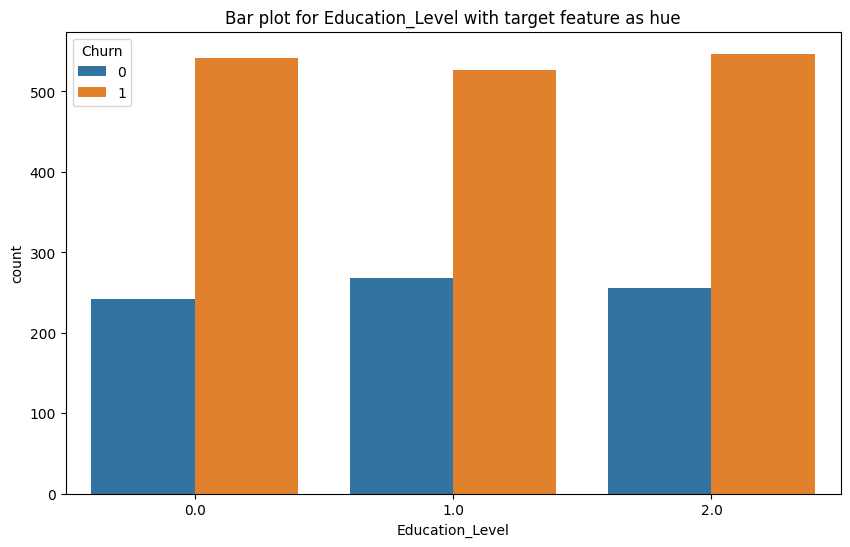

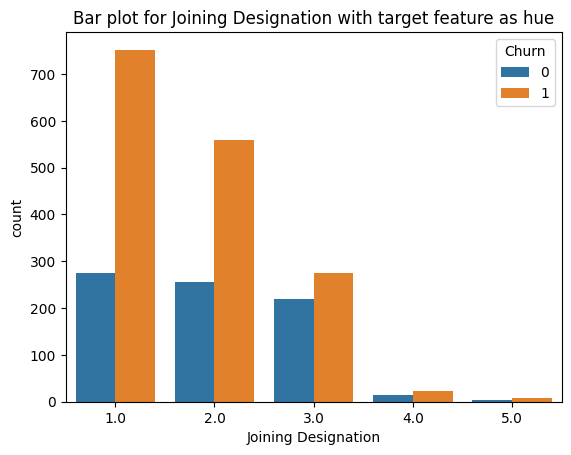

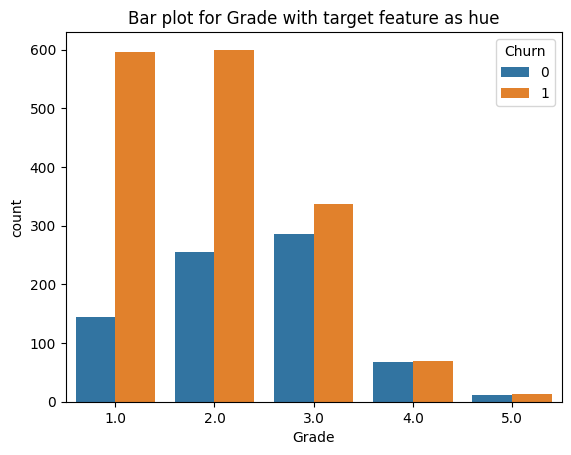

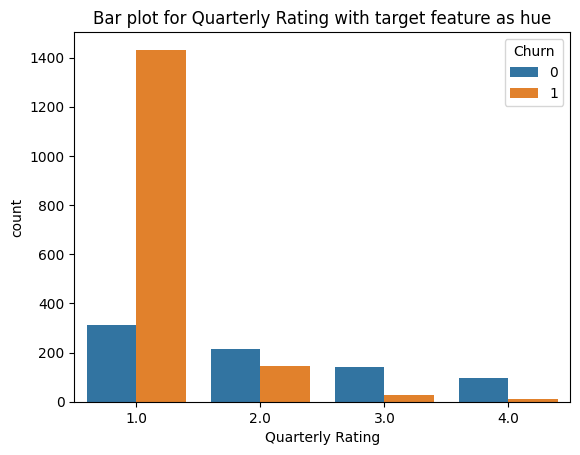

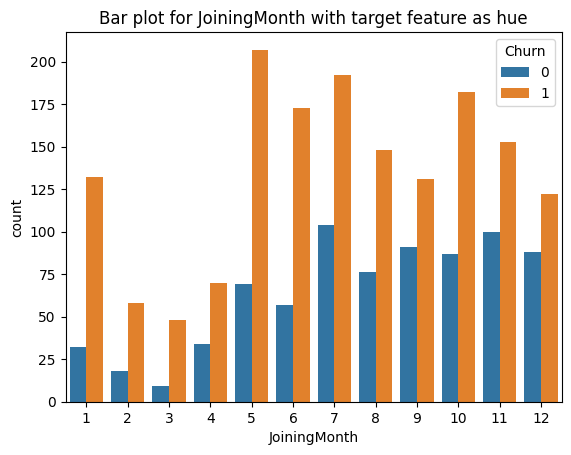

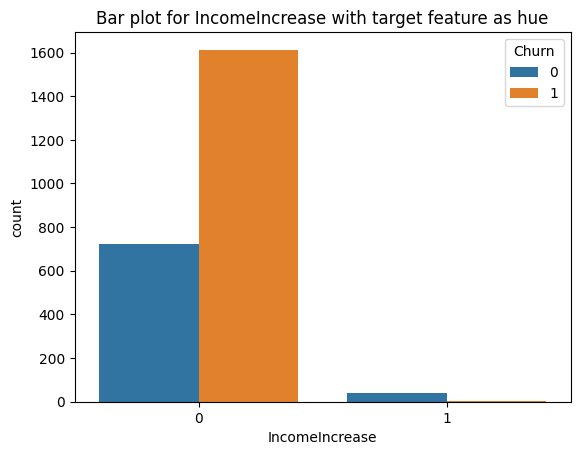

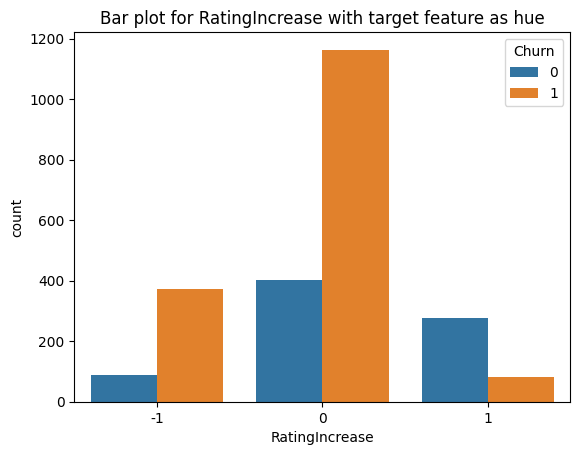

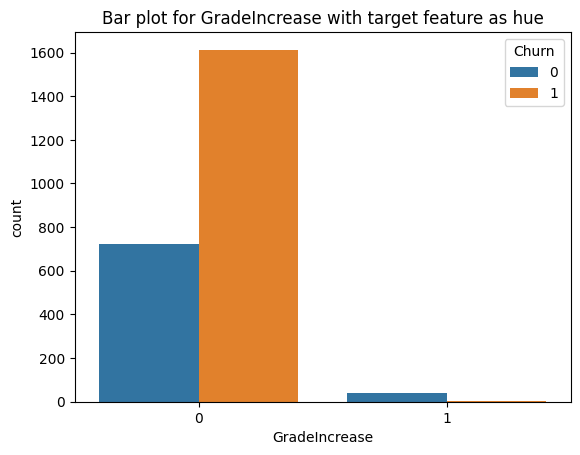

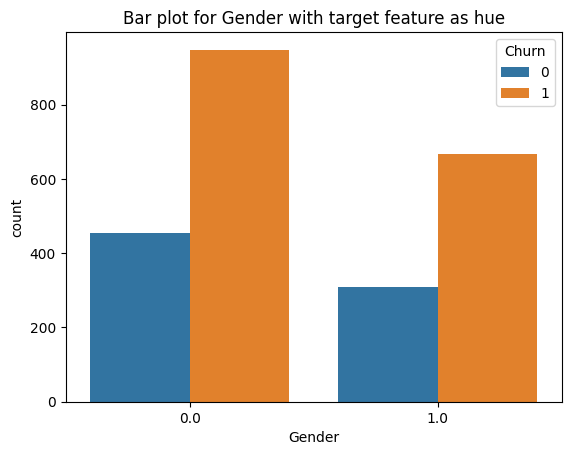

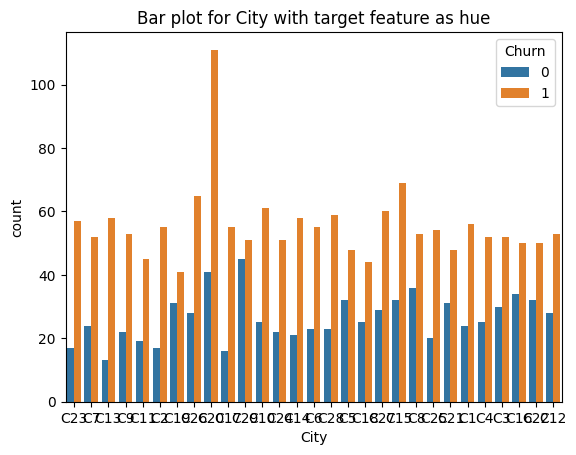

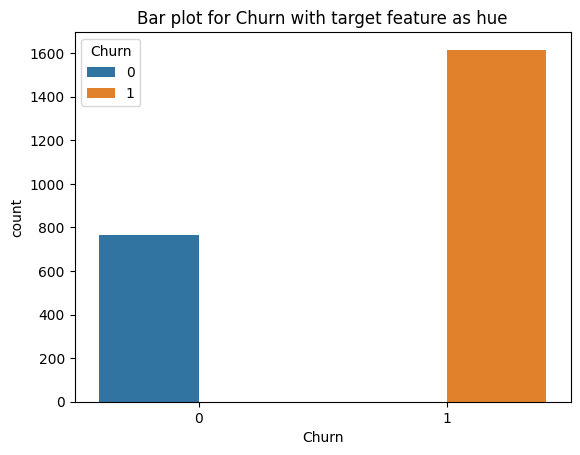

In [ ]:
# Create bar plot
plt.figure(figsize=(10, 6))
for col in cat_cols:  # Exclude the target column
    sns.countplot(x=col, hue='Churn', data=df2_agg)
    plt.title(f'Bar plot for {col} with target feature as hue')
    plt.show()

**Insight**
1)For each joining designation, probability of churn is higher than not churn.

2)For Grade 1,2&3:- Probability of churning is higher as compared to not churning. But for Grade 4 & 5:- Probability of churn vs. not churn is almost equal.

3)If Quarterly Rating is 1, then probability of that Driver Churning is much higher than not churning. If Quarterly Rating is above 1 then Probability of Driver Not churning is higher then that of Churning.

4)If there is IncomeIncrease, then Probability of that driver to Not Churn is High.

5)IF there is RatingIncrease, then Probability of that driver to Not Churn is High. If there is decrease or remain same in Rating then driver is more likely to churn.

6)If there is GradeIncrease, then Probability of that driver to Not Churn is High.

# Hypothesis Testing

In [ ]:
#Now lets do hypothesis testing to see if our numerical columns affect Churn feature
#We use ttest
from scipy.stats import ttest_ind

# Perform t-test for each numerical column
for col in num_cols:
    churn_yes = df2_agg[df2_agg['Churn'] == 1][col]
    churn_no = df2_agg[df2_agg['Churn'] == 0][col]

    t_statistic, p_value = ttest_ind(churn_yes, churn_no, equal_var=False)
    print(f'P-value for {col}: {p_value}\n')

P-value for Age: 7.254685558389959e-05

P-value for Income: 1.1478152190994176e-21

P-value for Total Business Value: 1.2332082834621812e-45

P-value for SumOf_diff_bussValue: 4.8938992794330825e-14



In [ ]:
from scipy.stats import mannwhitneyu
# Perform Mann-Whitney U test for each numerical column
for col in num_cols:
    churn_yes = df2_agg[df2_agg['Churn'] == 1][col]
    churn_no = df2_agg[df2_agg['Churn'] == 0][col]

    stat, p_value = mannwhitneyu(churn_yes, churn_no, alternative='two-sided')
    print(f'P-value for {col}: {p_value}\n')

P-value for Age: 2.988960660315412e-05

P-value for Income: 2.141977374254948e-23

P-value for Total Business Value: 2.625202102681489e-46

P-value for SumOf_diff_bussValue: 3.1575856578673117e-91



In [ ]:
#NOw lets do hypothesis testing to find if our categorical features has any impact on target feature "Churn"
from scipy.stats import chi2_contingency

# Perform Chi-Square test for each categorical column
for col in cat_cols:
    contingency_table = pd.crosstab(df2_agg[col], df2_agg['Churn'])

    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'P-value for {col}: {p}\n')

P-value for Education_Level: 0.46643939521309963

P-value for Joining Designation: 5.457615375535053e-10

P-value for Grade: 2.8955519930847994e-27

P-value for Quarterly Rating: 2.5289656594512383e-142

P-value for JoiningMonth: 1.6242862540266907e-08

P-value for IncomeIncrease: 2.5729990685015372e-17

P-value for RatingIncrease: 3.8437443138819906e-87

P-value for GradeIncrease: 2.5729990685015372e-17

P-value for Gender: 0.7396634124788158

P-value for City: 0.013977549937173567

P-value for Churn: 0.0



**Insights**
Education Level & Gender has no effect on our target variable Churn.

In [ ]:
#Education Level and Gender has no effect on Churn feature
#So lets drop them
df2_agg.drop(["Education_Level","Gender"],inplace=True,axis=1)

# Spearman Correlation Heatmap

<ipython-input-63-31447f95879b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df2_agg.corr(method='spearman')


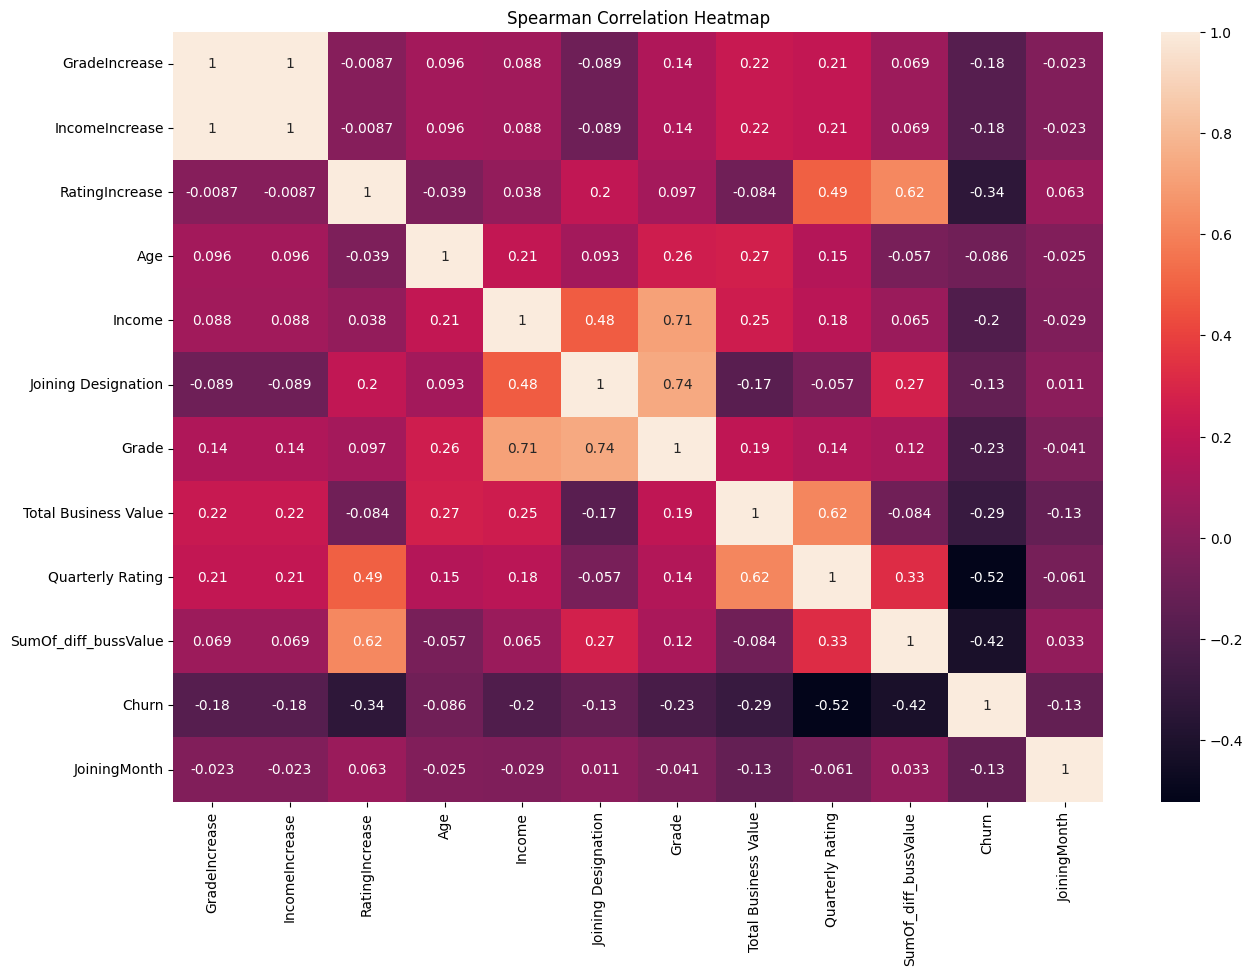

In [ ]:
#Now lets find correlation heatmap
#We will use spearman correlation because our df has outliers and also Ordinal variables
plt.figure(figsize=(15, 10))
corr_matrix = df2_agg.corr(method='spearman')
sns.heatmap(corr_matrix,annot=True)
plt.title('Spearman Correlation Heatmap')
plt.show()

In [ ]:
#Because GradeIncrease and IncomeIncrease are correlated, we will remove gradeIncrease column
df2_agg.drop(["GradeIncrease"],axis=1,inplace=True)

In [ ]:
df2_agg

,IncomeIncrease,RatingIncrease,Age,City,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,SumOf_diff_bussValue,Churn,JoiningMonth
0,0,0,28.0,C23,57387.0,1.0,1.0,1715580.0,2.0,-2381060.0,1,12
1,0,0,31.0,C7,67016.0,2.0,2.0,0.0,1.0,0.0,0,11
2,0,0,43.0,C13,65603.0,2.0,2.0,350000.0,1.0,0.0,1,12
3,0,0,29.0,C9,46368.0,1.0,1.0,120360.0,1.0,0.0,1,1
4,0,1,31.0,C11,78728.0,3.0,3.0,1265000.0,2.0,0.0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,1,34.0,C24,82815.0,2.0,3.0,21748820.0,4.0,-721110.0,0,10
2377,0,0,34.0,C9,12105.0,1.0,1.0,0.0,1.0,0.0,1,8
2378,0,-1,45.0,C19,35370.0,2.0,2.0,2815090.0,1.0,-221080.0,1,7
2379,0,-1,28.0,C20,69498.0,1.0,1.0,977830.0,1.0,-408090.0,1,7


In [ ]:
df2_agg["Churn"].value_counts()

1    1616
0     765
Name: Churn, dtype: int64

In [ ]:
df2_agg.columns

Index(['IncomeIncrease', 'RatingIncrease', 'Age', 'City', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'SumOf_diff_bussValue', 'Churn', 'JoiningMonth'],
      dtype='object')

In [ ]:
!pip install git+https://github.com/scikit-optimize/scikit-optimize.git

  Cloning https://github.com/scikit-optimize/scikit-optimize.git to /tmp/pip-req-build-i7x8uxyd
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-optimize/scikit-optimize.git /tmp/pip-req-build-i7x8uxyd
  Resolved https://github.com/scikit-optimize/scikit-optimize.git to commit a2369ddbc332d16d8ff173b12404b03fea472492
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pyaml-23.12.0-py3-none-any.whl (23 kB)
  Created wheel for scikit-optimize: filename=scikit_optimize-0.9.0-py2.py3-none-any.whl size=100246 sha256=83113f336d92cb1b764957fefc3dff6ed73e0b9c1a9ee815845be9c6def3e0fa
  Stored in directory: /tmp/pip-ephem-wheel-cache-ypn25w17/wheels/2f/f0/ed/db529a96372d05bd34f6c3a2fa7c08ef7a8314315ac46e49d7
Successfully built scikit-optimize


# Mean Encoding & Normalization & Train-Val-test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from skopt import BayesSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

features_to_normalize = ['RatingIncrease', 'Age', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'SumOf_diff_bussValue', 'JoiningMonth']

# Splitting the data into train, validation, and test sets
train_df, test_df = train_test_split(df2_agg, test_size=0.2, random_state=42, stratify=df2_agg['Churn'])
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['Churn'])

# Mean encoding on "City" column based on the target feature "Churn"
mean_encoded_city = train_df.groupby('City')['Churn'].mean()
train_df['City'] = train_df['City'].map(mean_encoded_city)
val_df['City'] = val_df['City'].map(mean_encoded_city)
test_df['City'] = test_df['City'].map(mean_encoded_city)

# Separating features and target variable
X_train, y_train = train_df.drop('Churn', axis=1), train_df['Churn']
X_val, y_val = val_df.drop('Churn', axis=1), val_df['Churn']
X_test, y_test = test_df.drop('Churn', axis=1), test_df['Churn']

# Normalization of features except target feature "Churn"
scaler = MinMaxScaler()

X_train[features_to_normalize] = scaler.fit_transform(X_train[features_to_normalize])
X_val[features_to_normalize] = scaler.transform(X_val[features_to_normalize])
X_test[features_to_normalize] = scaler.transform(X_test[features_to_normalize])

In [ ]:
X_train

,IncomeIncrease,RatingIncrease,Age,City,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,SumOf_diff_bussValue,JoiningMonth
432,0,0.0,0.513514,0.674419,0.104035,0.00,0.25,0.088412,0.333333,0.284681,0.909091
1493,0,0.5,0.378378,0.681818,0.390311,0.50,0.50,0.037072,0.000000,0.292539,0.272727
2009,0,0.5,0.351351,0.654545,0.106348,0.00,0.00,0.014326,0.000000,0.287653,0.909091
1236,0,0.5,0.270270,0.764045,0.134214,0.00,0.00,0.034564,0.333333,0.282917,0.727273
1864,0,0.5,0.216216,0.716418,0.113766,0.00,0.00,0.015877,0.000000,0.292122,0.818182
...,...,...,...,...,...,...,...,...,...,...,...
2041,0,0.5,0.459459,0.600000,0.208650,0.25,0.25,0.014326,0.000000,0.287653,0.363636
1936,0,0.0,0.459459,0.730769,0.254380,0.00,0.25,0.041930,0.000000,0.245698,0.545455
1486,0,0.5,0.297297,0.791667,0.478834,0.50,0.50,0.014326,0.000000,0.287653,0.363636
1881,0,0.5,0.081081,0.674419,0.598094,0.50,0.50,0.017893,0.000000,0.287653,0.363636


In [ ]:
X_train.columns

Index(['IncomeIncrease', 'RatingIncrease', 'Age', 'City', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'SumOf_diff_bussValue', 'JoiningMonth'],
      dtype='object')

In [ ]:
X_val

,IncomeIncrease,RatingIncrease,Age,City,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,SumOf_diff_bussValue,JoiningMonth
1561,0,1.0,0.243243,0.681818,0.391853,0.25,0.25,0.057432,1.0,0.332328,0.454545
1281,0,0.5,0.270270,0.732143,0.260932,0.00,0.00,0.014326,0.0,0.287653,0.636364
1300,0,0.5,0.270270,0.648148,0.401275,0.25,0.25,0.016362,0.0,0.293518,0.363636
965,0,0.5,0.270270,0.653061,0.397887,0.50,0.50,0.014326,0.0,0.287653,0.363636
1628,0,0.5,0.540541,0.681818,0.480641,0.50,0.50,0.054057,0.0,0.287653,0.909091
...,...,...,...,...,...,...,...,...,...,...,...
208,0,0.0,0.513514,0.764045,0.149709,0.00,0.25,0.046330,0.0,0.276388,0.363636
1122,0,0.5,0.621622,0.674419,0.317401,0.00,0.00,0.032444,0.0,0.291892,0.636364
1528,0,0.5,0.108108,0.600000,0.195749,0.00,0.00,0.022275,0.0,0.287653,1.000000
625,0,0.5,0.378378,0.730769,0.048083,0.00,0.00,0.016693,0.0,0.280835,0.727273


In [ ]:
X_test

,IncomeIncrease,RatingIncrease,Age,City,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,SumOf_diff_bussValue,JoiningMonth
937,0,0.5,0.135135,0.672727,0.166437,0.00,0.00,0.014326,0.000000,0.287653,0.636364
765,0,0.5,0.216216,0.764045,0.100286,0.00,0.00,0.017501,0.000000,0.278861,0.454545
34,0,0.5,0.405405,0.761905,0.176866,0.00,0.00,0.017823,0.000000,0.280748,0.818182
480,0,1.0,0.540541,0.791667,0.189085,0.00,0.00,0.032137,0.666667,0.296414,0.636364
303,0,0.5,0.513514,0.716418,0.602704,0.50,0.50,0.067834,0.000000,0.296588,0.818182
...,...,...,...,...,...,...,...,...,...,...,...
1934,0,0.5,0.324324,0.600000,0.198659,0.50,0.50,0.014326,0.000000,0.287653,0.272727
2031,0,1.0,0.162162,0.578947,0.213878,0.00,0.00,0.069158,0.666667,0.290970,0.272727
2155,0,0.5,0.108108,0.648148,0.030725,0.00,0.00,0.029318,0.000000,0.287653,0.818182
195,0,0.0,0.648649,0.674419,0.239983,0.00,0.00,0.121754,0.000000,0.252286,0.545455


In [ ]:
#NOW lets combine # Combine X_train and X_val, y_train and y_val for the training set
X_train = pd.concat([X_train, X_val], axis=0)
y_train = pd.concat([y_train, y_val], axis=0)

In [ ]:
X_train

,IncomeIncrease,RatingIncrease,Age,City,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,SumOf_diff_bussValue,JoiningMonth
432,0,0.0,0.513514,0.674419,0.104035,0.00,0.25,0.088412,0.333333,0.284681,0.909091
1493,0,0.5,0.378378,0.681818,0.390311,0.50,0.50,0.037072,0.000000,0.292539,0.272727
2009,0,0.5,0.351351,0.654545,0.106348,0.00,0.00,0.014326,0.000000,0.287653,0.909091
1236,0,0.5,0.270270,0.764045,0.134214,0.00,0.00,0.034564,0.333333,0.282917,0.727273
1864,0,0.5,0.216216,0.716418,0.113766,0.00,0.00,0.015877,0.000000,0.292122,0.818182
...,...,...,...,...,...,...,...,...,...,...,...
208,0,0.0,0.513514,0.764045,0.149709,0.00,0.25,0.046330,0.000000,0.276388,0.363636
1122,0,0.5,0.621622,0.674419,0.317401,0.00,0.00,0.032444,0.000000,0.291892,0.636364
1528,0,0.5,0.108108,0.600000,0.195749,0.00,0.00,0.022275,0.000000,0.287653,1.000000
625,0,0.5,0.378378,0.730769,0.048083,0.00,0.00,0.016693,0.000000,0.280835,0.727273


In [ ]:
y_train

432     1
1493    0
2009    1
1236    1
1864    0
       ..
208     1
1122    1
1528    1
625     1
1120    1
Name: Churn, Length: 1904, dtype: int64

# Random Forest:- Training, Hyperparameter tuning & Test Results

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier


# Define the class weights because our data is imbalanced
class_weights = {0: 2, 1: 1}

# Bayesian Search CV to find the best hyperparameters
param_space = {
    'n_estimators': (10, 500),
    'max_depth': (3, 45),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 10),
}

rf = RandomForestClassifier(class_weight=class_weights, random_state=42)
opt = BayesSearchCV(rf, param_space, n_iter=50, cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=42), n_jobs=-1, scoring='roc_auc', random_state=42)
opt.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", opt.best_params_)


Best Hyperparameters: OrderedDict([('max_depth', 10), ('min_samples_leaf', 1), ('min_samples_split', 10), ('n_estimators', 339)])


Precision: 0.9297124600638977
Recall: 0.8981481481481481
F1Score: 0.9136577708006279
ROC AUC: 0.9336924070039538


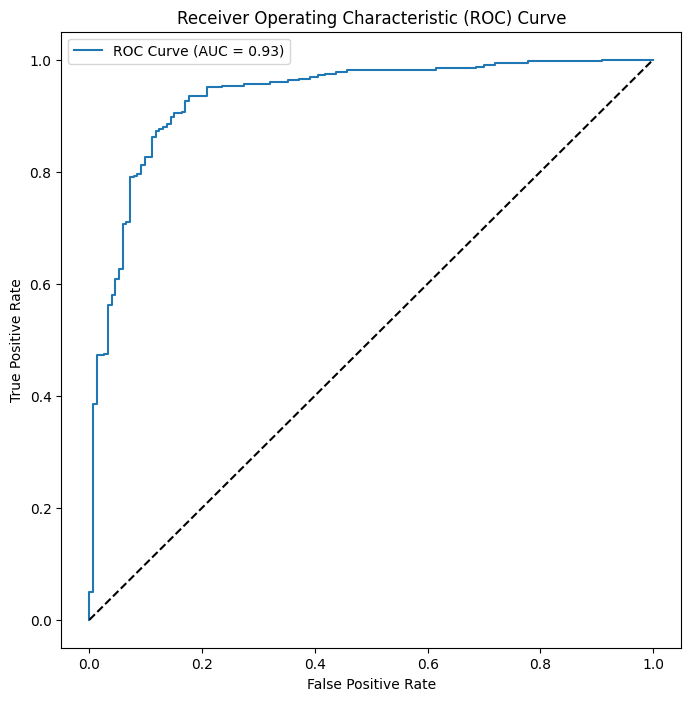

In [ ]:
# Train the Random Forest model with the best hyperparameters
best_rf = opt.best_estimator_
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Calculate performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1Score: {f1}")
print(f"ROC AUC: {roc_auc}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       153
           1       0.93      0.90      0.91       324

    accuracy                           0.88       477
   macro avg       0.86      0.88      0.87       477
weighted avg       0.89      0.88      0.89       477

Confusion Matrix:
[[131  22]
 [ 33 291]]


In [ ]:
#NOw lets also get the feature importances
feature_names = ['IncomeIncrease', 'RatingIncrease', 'Age', 'City', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'SumOf_diff_bussValue', 'JoiningMonth']


# Access feature importances
feature_importances = best_rf.feature_importances_


# Create a dictionary to pair feature names with their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the features based on their importances
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display the sorted feature importances
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

SumOf_diff_bussValue: 0.2771068033055797
Total Business Value: 0.1812008244577785
Quarterly Rating: 0.13888649111414317
JoiningMonth: 0.1079216806278633
Income: 0.06860191484873966
RatingIncrease: 0.06323353492567332
City: 0.051082216936565776
Age: 0.0484780388484003
Joining Designation: 0.030270579893077673
Grade: 0.029563549538794375
IncomeIncrease: 0.0036543655033843157


Conclusion of Results:

1)AUC-ROC: 0.93

2)F1score for Class 0 (Minority class):- 0.83 & For class 1:-0.91

3)55 Missclassified out of 477 test data points.

4)SumOf_diffBussValue Most important feature

In [ ]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


# Balanced Random Forest Classifier

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Best Hyperparameters: OrderedDict([('max_depth', 10), ('min_samples_leaf', 1), ('min_samples_split', 8), ('n_estimators', 303)])
Precision: 0.9421768707482994
Recall: 0.8549382716049383
F1Score: 0.8964401294498382
ROC AUC: 0.9315541031227307
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       153
           1       0.94      0.85      0.90       324

    accuracy                           0.87       477
   macro avg       0.84      0.87      0.85       477
weighted avg       0.88      0.87      0.87       477

Confusion Matrix on Test Set:
[[136  17]
 [ 47 277]]


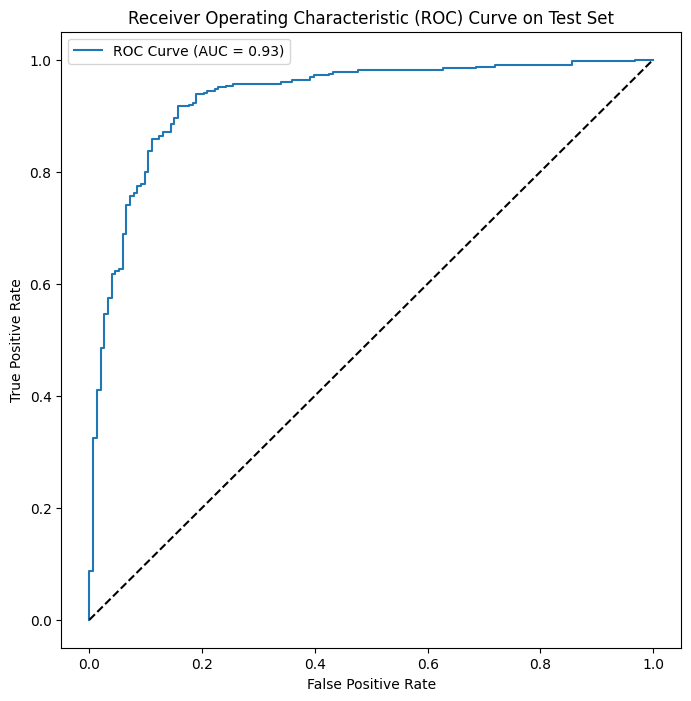

SumOf_diff_bussValue: 0.2674973251827537
Total Business Value: 0.17979995654950406
Quarterly Rating: 0.13437260973383375
JoiningMonth: 0.10832723904953759
Income: 0.07607519802899132
RatingIncrease: 0.05958125399836072
City: 0.05758282004028386
Age: 0.05295037463445947
Joining Designation: 0.031568569394954435
Grade: 0.029539565851823872
IncomeIncrease: 0.0027050875354972586


In [ ]:
#Now lets try out BalancedRandomForestClassifier because our data is imbalanced

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from skopt import BayesSearchCV
import matplotlib.pyplot as plt


# Define the search space for hyperparameters
param_space = {
    'n_estimators': (30, 500),
    'max_depth': (3, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 10),
}

# Create a Balanced Random Forest Classifier
brf_classifier = BalancedRandomForestClassifier(random_state=42)

# Perform Bayesian Search CV
opt = BayesSearchCV(brf_classifier, param_space, n_iter=50, cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=42), scoring='roc_auc', n_jobs=-1, random_state=42)
opt.fit(X_train, y_train)

# Print the best hyperparameters
best_params = opt.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate on the test set
best_brf_model = opt.best_estimator_
y_test_pred_prob = best_brf_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Calculate performance metrics
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1Score: {f1}")
print(f"ROC AUC: {roc_auc}")

# Classification Report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix on Test Set:")
print(conf_matrix)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Test Set')
plt.legend()
plt.show()

# Feature Importances
feature_importances = best_brf_model.feature_importances_

# Create a dictionary to pair feature names with their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the features based on their importances
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display the sorted feature importances
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

Conclusion of Results:

1)AUC-ROC: 0.93

2)F1score for Class 0 (Minority class):- 0.81 & For class 1:-0.90

3)64 Missclassified out of 477 test data points.

4)SumOf_diffBussValue Most important feature

# XGBoost Classifier

Best Hyperparameters: OrderedDict([('colsample_bytree', 1.0), ('gamma', 0), ('learning_rate', 0.01), ('max_depth', 48), ('min_child_weight', 8), ('n_estimators', 453), ('subsample', 0.5776084416838791)])
Precision: 0.9281045751633987
Recall: 0.8765432098765432
F1Score: 0.9015873015873016
ROC AUC: 0.930727023319616
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       153
           1       0.93      0.88      0.90       324

    accuracy                           0.87       477
   macro avg       0.85      0.87      0.86       477
weighted avg       0.88      0.87      0.87       477

Confusion Matrix on Test Set:
[[131  22]
 [ 40 284]]


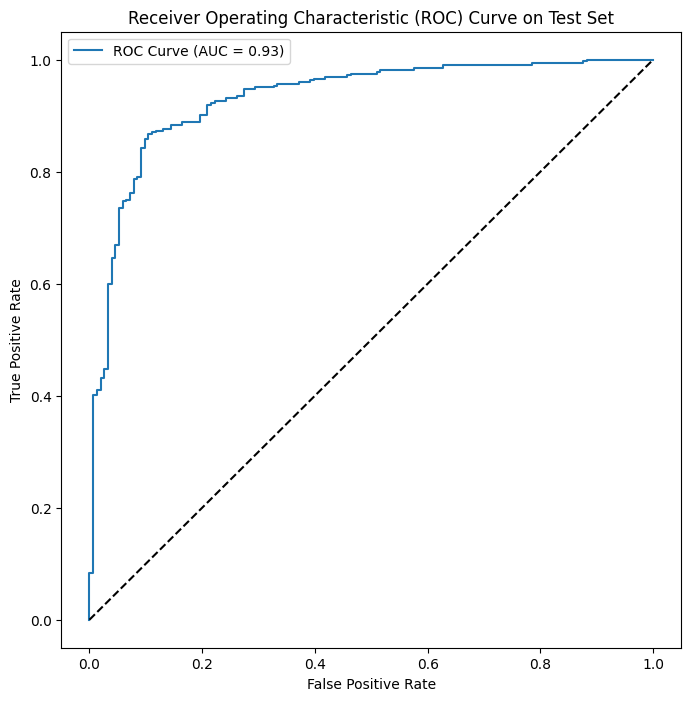

In [ ]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from skopt import BayesSearchCV


# Define class labels
class_labels = {0: 2, 1: 1}

# Define the search space for hyperparameters
param_space = {
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'n_estimators': (30, 500),
    'max_depth': (3, 100),
    'min_child_weight': (1, 10),
    'subsample': (0.1, 1.0, 'uniform'),
    'gamma': (0, 1.0, 'uniform'),
    'colsample_bytree': (0.1, 1.0, 'uniform'),
}

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(scale_pos_weight=class_labels[1] / class_labels[0], random_state=42)

# Perform Bayesian Search CV
opt = BayesSearchCV(xgb_model, param_space, n_iter=50, cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=42), scoring='roc_auc', n_jobs=-1, random_state=42)
opt.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", opt.best_params_)

# Evaluate on the validation set
best_xgb_model = opt.best_estimator_
y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]
y_pred = best_xgb_model.predict(X_test)

# Calculate performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1Score: {f1}")
print(f"ROC AUC: {roc_auc}")

# Classification Report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix on Test Set:")
print(conf_matrix)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Test Set')
plt.legend()
plt.show()


In [ ]:
#Now lets see feature importances for xgb model we trained

# Get the booster from the trained XGBoost model
booster = best_xgb_model.get_booster()

# Get feature importances based on how many times a feature is used for splitting
feature_importances = booster.get_score(importance_type='weight')

# Sort the features based on their importances
sorted_feature_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Display the sorted feature importances
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

Total Business Value: 862.0
Income: 637.0
JoiningMonth: 623.0
SumOf_diff_bussValue: 556.0
City: 510.0
Joining Designation: 366.0
Age: 356.0
Quarterly Rating: 275.0
Grade: 48.0
RatingIncrease: 16.0


Conclusion of Results:
1)AUC-ROC: 0.93

2)F1score for Class 0 (Minority class):- 0.81 & For class 1:-0.90

3)62 Missclassified out of 477 test data points.

4)Income & Total Bussiness Value are Most important features

# LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1292, number of negative: 612
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 1904, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513514 -> initscore=0.054067
[LightGBM] [Info] Start training from score 0.054067
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

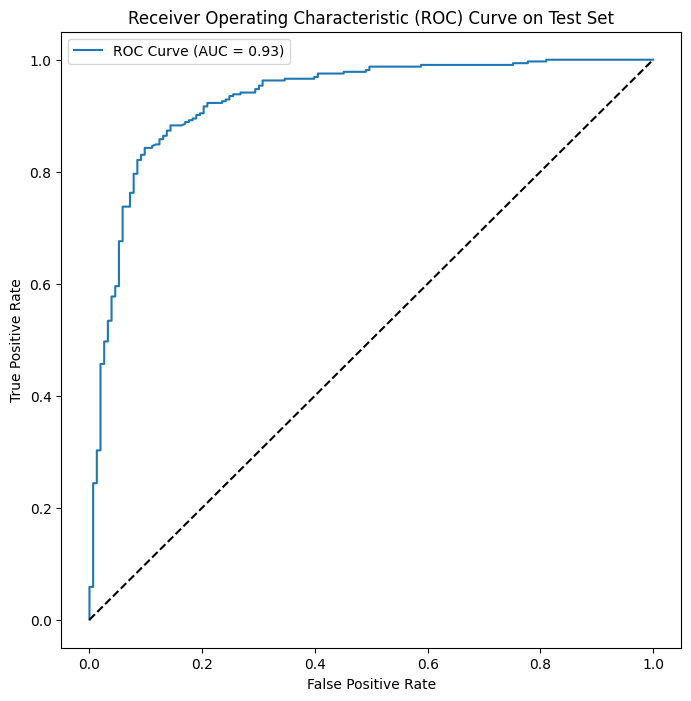

Feature Importances:
Total Business Value: 723
SumOf_diff_bussValue: 591
JoiningMonth: 439
City: 386
Age: 261
Quarterly Rating: 253
Income: 253
Joining Designation: 180
Grade: 169
RatingIncrease: 122
IncomeIncrease: 1


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_fscore_support, roc_curve
from skopt import BayesSearchCV
import matplotlib.pyplot as plt


# Define class weights
class_weights = {0: 2, 1: 1}

# Define the search space for hyperparameters
param_space = {
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'n_estimators': (30, 500),
    'max_depth': (3, 105),
    'subsample': (0.1, 1.0, 'uniform'),
    'colsample_bytree': (0.1, 1.0, 'uniform'),
    'reg_alpha': (1e-9, 20.0, 'log-uniform'),
    'reg_lambda': (1e-9, 20.0, 'log-uniform'),
}

# Create a LightGBM classifier
lgb_model = lgb.LGBMClassifier(class_weight=class_weights, random_state=42)

# Perform Bayesian Search CV
opt = BayesSearchCV(lgb_model, param_space, n_iter=50, cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=42), scoring='roc_auc', n_jobs=-1, random_state=42)
opt.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", opt.best_params_)

# Evaluate on the test set
best_lgb_model = opt.best_estimator_
y_test_pred_prob = best_lgb_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred_prob > 0.5).astype(int)


# Calculate performance metrics
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
print(f"ROC-AUC: {roc_auc}")

# Classification Report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Test Set')
plt.legend()
plt.show()

# Feature Importances
feature_importances = best_lgb_model.feature_importances_
sorted_feature_importances = sorted(zip(feature_importances, feature_names), reverse=True)
print("Feature Importances:")
for importance, feature in sorted_feature_importances:
    print(f"{feature}: {importance}")


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix on Test Set:")
print(conf_matrix)


Confusion Matrix on Test Set:
[[130  23]
 [ 38 286]]


Conclusion of Results:

1)AUC-ROC: 0.93

2)F1score for Class 0 (Minority class):- 0.81 & For class 1:-0.90

3)61 Missclassified out of 477 test data points.

4)Total Bussiness Value is Most important feature.

# RUSBoost

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_weight_boosting.py:271: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Best Hyperparameters: OrderedDict([('algorithm', 'SAMME.R'), ('base_estimator__max_depth', 63), ('base_estimator__min_samples_leaf', 10), ('base_estimator__min_samples_split', 10), ('learning_rate', 1.0), ('n_estimators', 400)])
Precision: 0.9361022364217252
Recall: 0.904320987654321
F1 score: 0.9199372056514914
ROC-AUC: 0.9312313402727345
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       153
           1       0.94      0.90      0.92       324

    accuracy                           0.89       477
   macro avg       0.87      0.89      0.88       477
weighted avg       0.90      0.89      0.89       477

Confusion Matrix on Test Set:
[[133  20]
 [ 31 293]]


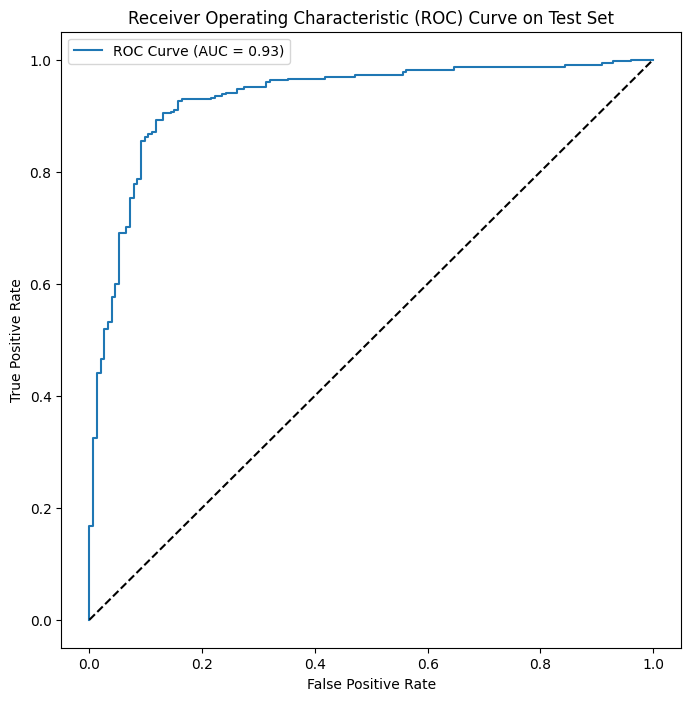

In [ ]:
#Now lets use RUSBoost
from imblearn.ensemble import RUSBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from skopt import BayesSearchCV
import matplotlib.pyplot as plt

# Define the search space for hyperparameters
param_space = {
    'n_estimators': (30, 400),
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'algorithm': ['SAMME', 'SAMME.R'],
    'base_estimator__max_depth': (3, 100),
    'base_estimator__min_samples_split': (2, 10),
    'base_estimator__min_samples_leaf': (1, 10),
}


# Create a RUSBoostClassifier with DecisionTreeClassifier as base estimator
base_estimator = DecisionTreeClassifier(random_state=42)
rusboost_classifier = RUSBoostClassifier(base_estimator=base_estimator, random_state=42)

# Perform Bayesian Search CV
opt = BayesSearchCV(rusboost_classifier, param_space, n_iter=50, cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=42), scoring='roc_auc', n_jobs=-1, random_state=42)
opt.fit(X_train, y_train)

# Print the best hyperparameters
best_params = opt.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate on the test set
best_rusboost_model = opt.best_estimator_
y_test_pred_prob = best_rusboost_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Calculate performance metrics
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
print(f"ROC-AUC: {roc_auc}")

# Classification Report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix on Test Set:")
print(conf_matrix)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Test Set')
plt.legend()
plt.show()


In [ ]:
# Feature Importances
feature_importances = best_rusboost_model.feature_importances_
sorted_feature_importances = sorted(zip(feature_importances, feature_names), reverse=True)
print("Feature Importances:")
for importance, feature in sorted_feature_importances:
    print(f"{feature}: {importance}")

Feature Importances:
SumOf_diff_bussValue: 0.23845036308376996
Total Business Value: 0.17281148818423392
Income: 0.14053798424460073
Age: 0.1141813747518011
City: 0.11064766405278577
JoiningMonth: 0.09507094559487615
Quarterly Rating: 0.05668829112829859
Joining Designation: 0.02912089409374228
Grade: 0.01947495791205408
RatingIncrease: 0.017360179056271057
IncomeIncrease: 0.005655857897566038


Conclusion of Results:

1)AUC-ROC: 0.93

2)F1score for Class 0 (Minority class):- 0.84 & For class 1:-0.92

3)51 Missclassified out of 477 test data points.

4)SumOf_diff_bussValue is Most important feature.

In [ ]:
X_train

,IncomeIncrease,RatingIncrease,Age,City,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,SumOf_diff_bussValue,JoiningMonth
432,0,0.0,0.513514,0.674419,0.104035,0.00,0.25,0.088412,0.333333,0.284681,0.909091
1493,0,0.5,0.378378,0.681818,0.390311,0.50,0.50,0.037072,0.000000,0.292539,0.272727
2009,0,0.5,0.351351,0.654545,0.106348,0.00,0.00,0.014326,0.000000,0.287653,0.909091
1236,0,0.5,0.270270,0.764045,0.134214,0.00,0.00,0.034564,0.333333,0.282917,0.727273
1864,0,0.5,0.216216,0.716418,0.113766,0.00,0.00,0.015877,0.000000,0.292122,0.818182
...,...,...,...,...,...,...,...,...,...,...,...
208,0,0.0,0.513514,0.764045,0.149709,0.00,0.25,0.046330,0.000000,0.276388,0.363636
1122,0,0.5,0.621622,0.674419,0.317401,0.00,0.00,0.032444,0.000000,0.291892,0.636364
1528,0,0.5,0.108108,0.600000,0.195749,0.00,0.00,0.022275,0.000000,0.287653,1.000000
625,0,0.5,0.378378,0.730769,0.048083,0.00,0.00,0.016693,0.000000,0.280835,0.727273


In [ ]:
y_train.value_counts()

1    1292
0     612
Name: Churn, dtype: int64

# Resampling Using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
X_train_resampled

,IncomeIncrease,RatingIncrease,Age,City,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,SumOf_diff_bussValue,JoiningMonth
0,0,0.0,0.513514,0.674419,0.104035,0.00,0.250000,0.088412,0.333333,0.284681,0.909091
1,0,0.5,0.378378,0.681818,0.390311,0.50,0.500000,0.037072,0.000000,0.292539,0.272727
2,0,0.5,0.351351,0.654545,0.106348,0.00,0.000000,0.014326,0.000000,0.287653,0.909091
3,0,0.5,0.270270,0.764045,0.134214,0.00,0.000000,0.034564,0.333333,0.282917,0.727273
4,0,0.5,0.216216,0.716418,0.113766,0.00,0.000000,0.015877,0.000000,0.292122,0.818182
...,...,...,...,...,...,...,...,...,...,...,...
2579,0,0.5,0.307871,0.544003,0.232758,0.00,0.250000,0.227613,0.666667,0.296438,0.909091
2580,0,0.5,0.476864,0.705749,0.058840,0.00,0.000000,0.014326,0.000000,0.287653,0.876724
2581,0,1.0,0.399697,0.629188,0.468373,0.25,0.608567,0.397586,1.000000,0.495559,0.857661
2582,0,0.5,0.639591,0.698496,0.157984,0.00,0.433243,0.155361,0.422343,0.280443,0.496904


In [ ]:
y_train_resampled.value_counts()

1    1292
0    1292
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier




# Bayesian Search CV to find the best hyperparameters
param_space = {
    'n_estimators': (10, 1200),
    'max_depth': (3, 45),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 10),
}

rf = RandomForestClassifier(random_state=42)
opt = BayesSearchCV(rf, param_space, n_iter=50, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), n_jobs=-1, scoring='roc_auc', random_state=42)
opt.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", opt.best_params_)

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist

Best Hyperparameters: OrderedDict([('max_depth', 41), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 698)])


Precision: 0.926984126984127
Recall: 0.9012345679012346
F1Score: 0.9139280125195619
ROC AUC: 0.931836520616477


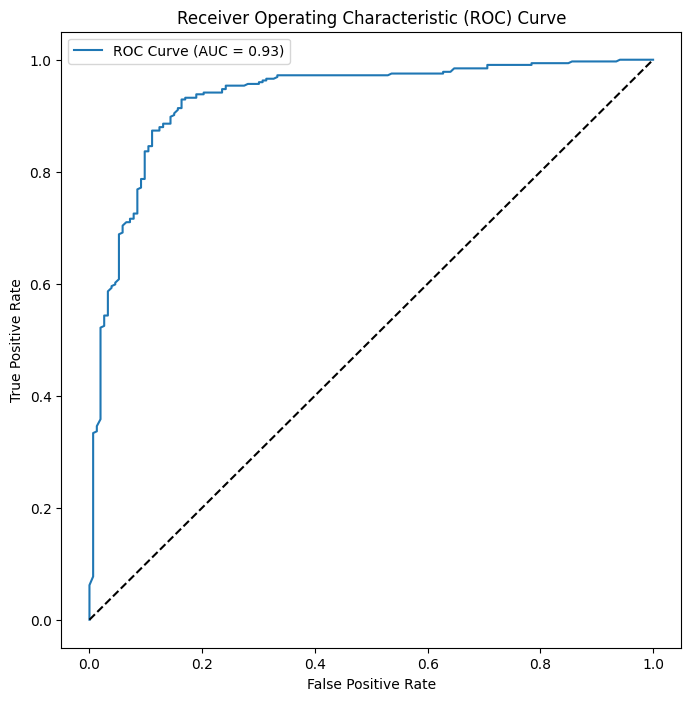

In [ ]:
# Train the Random Forest model with the best hyperparameters
best_rf_resampled = opt.best_estimator_
best_rf_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = best_rf_resampled.predict(X_test)
y_pred_proba = best_rf_resampled.predict_proba(X_test)[:, 1]

# Calculate performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1Score: {f1}")
print(f"ROC AUC: {roc_auc}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, best_rf_resampled.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       153
           1       0.93      0.90      0.91       324

    accuracy                           0.88       477
   macro avg       0.86      0.88      0.87       477
weighted avg       0.89      0.88      0.89       477

Confusion Matrix:
[[130  23]
 [ 32 292]]


Conclusion of Results:

1)AUC-ROC: 0.93

2)F1score for Class 0 (Minority class):- 0.83 & For class 1:-0.91

3)55 Missclassified out of 477 test data points.

Best Hyperparameters: OrderedDict([('colsample_bytree', 0.7837945779403727), ('gamma', 0), ('learning_rate', 0.062104881739710675), ('max_depth', 26), ('min_child_weight', 1), ('n_estimators', 500), ('subsample', 0.821710323810336)])
Precision: 0.9213836477987422
Recall: 0.904320987654321
F1Score: 0.912772585669782
ROC AUC: 0.9263495521665456
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       153
           1       0.92      0.90      0.91       324

    accuracy                           0.88       477
   macro avg       0.86      0.87      0.87       477
weighted avg       0.88      0.88      0.88       477

Confusion Matrix on Test Set:
[[128  25]
 [ 31 293]]


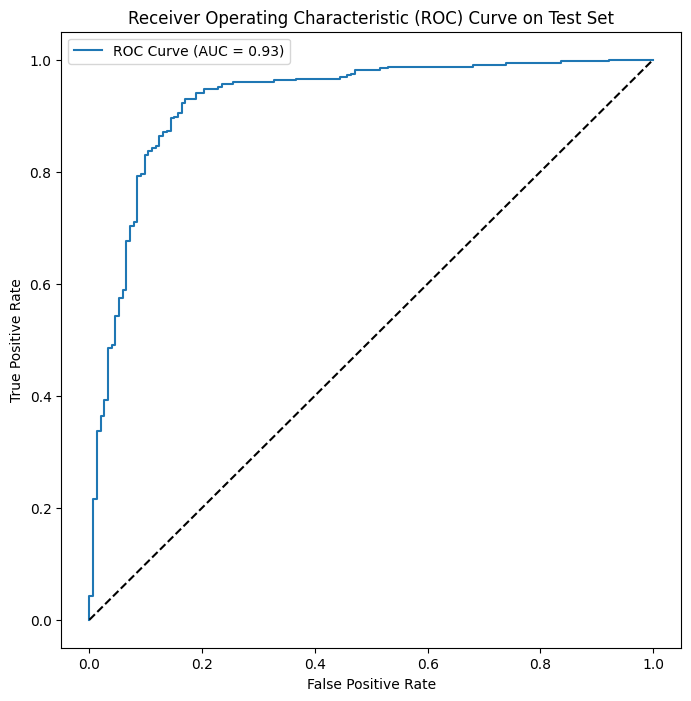

In [ ]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from skopt import BayesSearchCV



# Define the search space for hyperparameters
param_space = {
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'n_estimators': (30, 500),
    'max_depth': (3, 50),
    'min_child_weight': (1, 10),
    'subsample': (0.1, 1.0, 'uniform'),
    'gamma': (0, 1.0, 'uniform'),
    'colsample_bytree': (0.1, 1.0, 'uniform'),
}

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Perform Bayesian Search CV
opt = BayesSearchCV(xgb_model, param_space, n_iter=50, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='roc_auc', n_jobs=-1, random_state=42)
opt.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", opt.best_params_)

# Evaluate on the validation set
best_xgb_model = opt.best_estimator_
y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]
y_pred = best_xgb_model.predict(X_test)

# Calculate performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1Score: {f1}")
print(f"ROC AUC: {roc_auc}")

# Classification Report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix on Test Set:")
print(conf_matrix)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Test Set')
plt.legend()
plt.show()


In [ ]:
#Now lets see feature importances for xgb model we trained

# Get the booster from the trained XGBoost model
booster = best_xgb_model.get_booster()

# Get feature importances based on how many times a feature is used for splitting
feature_importances = booster.get_score(importance_type='weight')

# Sort the features based on their importances
sorted_feature_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Display the sorted feature importances
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

Income: 6220.0
Age: 4671.0
City: 4580.0
Total Business Value: 3246.0
JoiningMonth: 2961.0
SumOf_diff_bussValue: 1592.0
Joining Designation: 959.0
Grade: 620.0
Quarterly Rating: 483.0
RatingIncrease: 320.0
IncomeIncrease: 4.0


Conclusion of Results:

1)AUC-ROC: 0.93

2)F1score for Class 0 (Minority class):- 0.82 & For class 1:-0.91

3)56 Missclassified out of 477 test data points.

4)Income is Most important feature

# LightGBM on Resampled Data

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1292, number of negative: 1292
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1613
[LightGBM] [Info] Number of data points in the train set: 2584, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

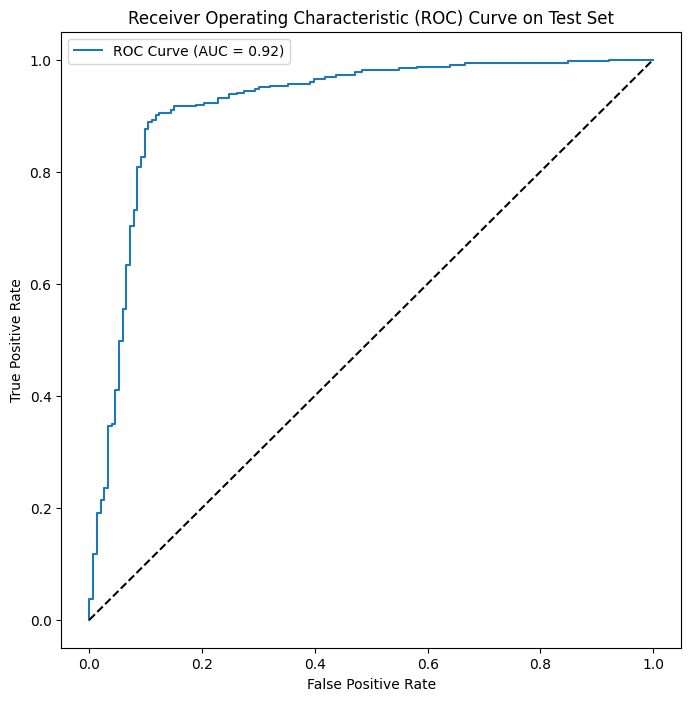

Feature Importances:
Income: 3456
Age: 2801
City: 2799
JoiningMonth: 1873
Total Business Value: 1743
SumOf_diff_bussValue: 1353
Joining Designation: 361
Quarterly Rating: 224
RatingIncrease: 179
Grade: 179
IncomeIncrease: 0


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_fscore_support, roc_curve
from skopt import BayesSearchCV
import matplotlib.pyplot as plt




# Define the search space for hyperparameters
param_space = {
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'n_estimators': (30, 500),
    'max_depth': (3, 100),
    'subsample': (0.1, 1.0, 'uniform'),
    'colsample_bytree': (0.1, 1.0, 'uniform'),
    'reg_alpha': (1e-9, 20.0, 'log-uniform'),
    'reg_lambda': (1e-9, 20.0, 'log-uniform'),
}

# Create a LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42)

# Perform Bayesian Search CV
opt = BayesSearchCV(lgb_model, param_space, n_iter=50, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='roc_auc', n_jobs=-1, random_state=42)
opt.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", opt.best_params_)

# Evaluate on the test set
best_lgb_model = opt.best_estimator_
y_test_pred_prob = best_lgb_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred_prob > 0.5).astype(int)


# Calculate performance metrics
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
print(f"ROC-AUC: {roc_auc}")

# Classification Report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Test Set')
plt.legend()
plt.show()

# Feature Importances
feature_importances = best_lgb_model.feature_importances_
sorted_feature_importances = sorted(zip(feature_importances, feature_names), reverse=True)
print("Feature Importances:")
for importance, feature in sorted_feature_importances:
    print(f"{feature}: {importance}")


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[128  25]
 [ 31 293]]


 Conclusion of Results:

1)AUC-ROC: 0.93

2)F1score for Class 0 (Minority class):- 0.81 & For class 1:-0.90

3)56 Missclassified out of 477 test data points.

4)Total Bussiness value is Most important feature

Important thing to Note:- Performance of all these models is same after resampling of data using SMOTE.



# Conclusion

**BEST MODEL** RUSBoost performed the best with the lowest number of Missclassified Points.

**Results**:

1)AUC-ROC: 0.93

2)F1score for Class 0 (Minority class):- 0.84 & For class 1:-0.92

3)51 Missclassified out of 477 test data points.

4)SumOf_diff_bussValue is Most important feature.

**Best Model Hyperparameters**

 ('algorithm' = 'SAMME.R'), ('base_estimator__max_depth' = 63), ('base_estimator__min_samples_leaf' = 10), ('base_estimator__min_samples_split' = 10), ('learning_rate' = 1.0), ('n_estimators' = 400)



# Recommendations for the company


**Recommendations:-**

1)Company should work closely with drivers whose Total Bussiness value is Not increasing or decreasing month after month of reporting and help them increase it.

2)Company should do the analysis of reveiws of the users and inform the driver about why their ratings are not increasing or why it is decreasing. This should help the driver make the necessary changes which will help their Grade, Rating and Income Increase.

3)More incentives should be provided to such drivers (like:- decrease in commision that the company takes from this driver) which will make them not leave.
